## Background
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Problem Statement
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
Predicting the risk of diabetes using clinical and lifestyle factors: This project will involve using supervised machine learning algorithms to predict the risk of diabetes in individuals based on their clinical and lifestyle factors such as age, gender, BMI, blood pressure, family history, physical activity, and diet.
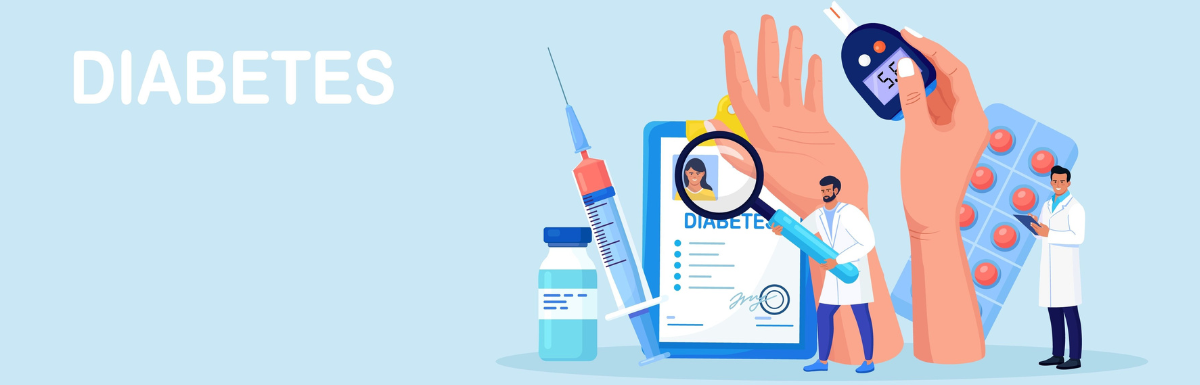

## Content
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [322]:
# import all the necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [207]:
# import and read file
df = pd.read_csv(r"C:\Users\user\Downloads\diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### Feature Description of Dataset
**Pregnancies** - *This column informs us about the number of times a patient has experienced pregnancy.*

**Glucose** -  *Plasma glucose concentration a 2 hours in an oral glucose tolerance test refers to the amount of glucose (sugar) present in the blood plasma.*

**BloodPressure** - *Diastolic blood pressure (mm Hg) is the lower number in a blood pressure reading and represents the pressure in the arteries when the heart is resting between beats. It is measured in millimeters of mercury (mmHg) and is an important indicator of cardiovascular health. A normal diastolic blood pressure reading is considered to be below 80 mmHg, while a reading between 80-89 mmHg is considered to be prehypertension, and a reading of 90 mmHg or higher is considered to be hypertension (high blood pressure).*

**SkinThickness** -  *Triceps skin fold thickness (mm) is a measure of subcutaneous fat located on the back of the upper arm. It is commonly used as an indicator of body fat percentage and is often included in anthropometric measurements to assess nutritional status and health risks.*

**Insulin** - *2-Hour serum insulin (mu U/ml) is an hormone produced by the pancreas that plays a crucial role in regulating blood sugar levels. It allows cells in the body to take in glucose (sugar) from the bloodstream and use it as a source of energy.*

**BMI** -  *Body mass index (weight in kg/(height in m)^2) is a measure of body fat based on height and weight. It is calculated by dividing a person's weight in kilograms by their height in meters squared (kg/m²). BMI is commonly used as a screening tool to identify whether a person is underweight, normal weight, overweight, or obese. The World Health Organization (WHO) defines BMI categories as follows: a BMI less than 18.5 is considered underweight, a BMI between 18.5 and 24.9 is considered normal weight, a BMI between 25 and 29.9 is considered overweight, and a BMI of 30 or higher is considered obese.*

**DiabetesPedigreeFunction** -  *Diabetes Pedigree Function is a function that scores the likelihood of diabetes based on family history. It provides a measure of the diabetes risk by taking into account the age and diabetes status of family members.*

**Age** - *The Age column tells us the age of the patient in years, providing demographic information.*

**Outcome** - *The Outcome column is a binary indicator that reveals whether the patient has diabetes or not. A value of 1 means they have diabetes, while 0 means they do not have diabetes. It's a crucial column indicating the target variable for prediction and analysis.*

## Data Inspection

In [208]:
# the head of the data
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [209]:
# the tail of the data
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [210]:
# shape of data
df.shape

(768, 9)

In [211]:
# columns of data
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [212]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [213]:
# data types for the columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [214]:
# check for duplicates
df.duplicated().sum()

0

In [215]:
# check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

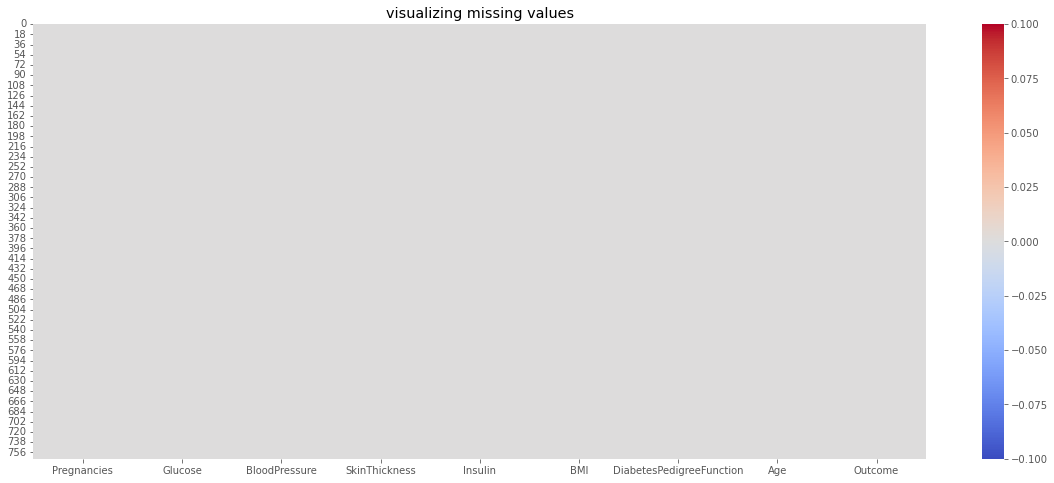

In [216]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

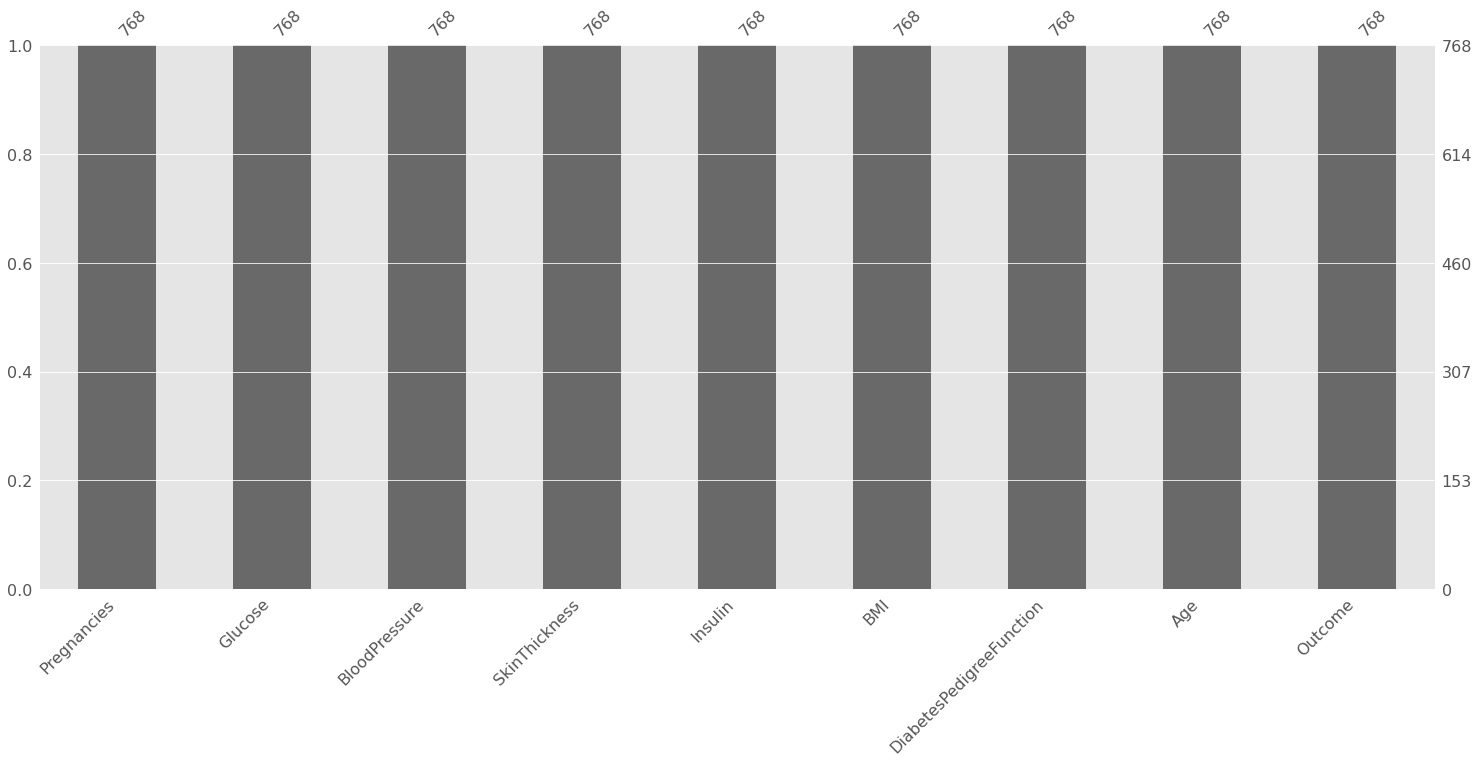

In [217]:
# check pattern of missingness
import missingno as msno
msno.bar(df)
plt.show()

*There are no pattern of missingness in the dataset*

In [218]:
# summary statistics of the data
df.describe().astype('int')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
count          768      768            768            768      768  768   
mean             3      120             69             20       79   31   
std              3       31             19             15      115    7   
min              0        0              0              0        0    0   
25%              1       99             62              0        0   27   
50%              3      117             72             23       30   32   
75%              6      140             80             32      127   36   
max             17      199            122             99      846   67   

       DiabetesPedigreeFunction  Age  Outcome  
count                       768  768      768  
mean                          0   33        0  
std                           0   11        0  
min                           0   21        0  
25%                           0   24        0  
50%                           0   29        0  
75%                           0   41        1  
max                           2   81        1

*The median number of Pregnancies is 3, highest level of Glucose is 199, and the BloodPressure is 122mmHg,the median number of SkinThickness is 23, and highest Insulin level is 846, the lowest and highest BMI is 0 and 67 respectively, while the mean age of patients is 33 years old.*

In [219]:
# fetch the number of negatives for each column
df_negative = (df < 0).sum()
print(df_negative)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [220]:
# fetch the number of 0s for each column
df_zeros = (df == 0).sum()
print(df_zeros)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


*Upon inspection of the dataset, it was found that the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' columns contain a significant number of zero values. For instance, the 'Glucose' column has 5 zero values, while the 'Insulin' column has 374 zero values. Since it is highly unlikely for these vital health indicators to have exact zero values, this suggests that null values might have been replaced with zeros during data preprocessing. These zero values could indicate potential anomalies, missing data points, or data issues that require further investigation.*

In [221]:
# replace the following columns with NaN (missing values)
columns = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
df[columns] = df[columns].replace(0, np.nan)

# check for the missing values in the columns
missing_values = df[columns].isnull().sum()
print(missing_values)


Glucose            5
BloodPressure     35
Insulin          374
BMI               11
SkinThickness    227
dtype: int64


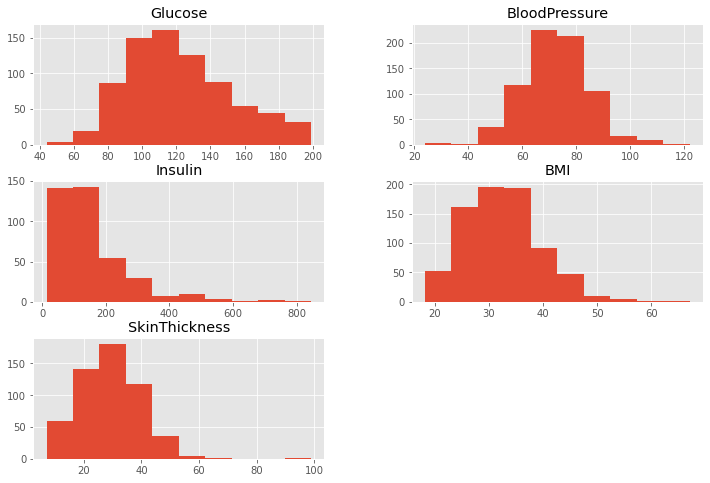

In [222]:
# Plotting the distribution of these columns to understand its skewness

ax = df[columns].hist(figsize=(12,8))
plt.show()

*Glucose, BloodPressure and BMI exhibit a normal distribution while Insulin, and SkinThickness exhibit skewness either to the left or right. Hence, we will handle the missing values using mean, and median imputation.*

In [223]:
# Handling of the missing values in the columns
#Using mean strategy for glucose due to its central tendency.
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

#Using mean strategy for blood pressure as well due to its central tendency.
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

#Using median strategy for skin thickness as the data is skewed.
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)

#Using median strategy for insulin as the data is skewed.
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

#Using mean strategy for BMI due to its central tendency.
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

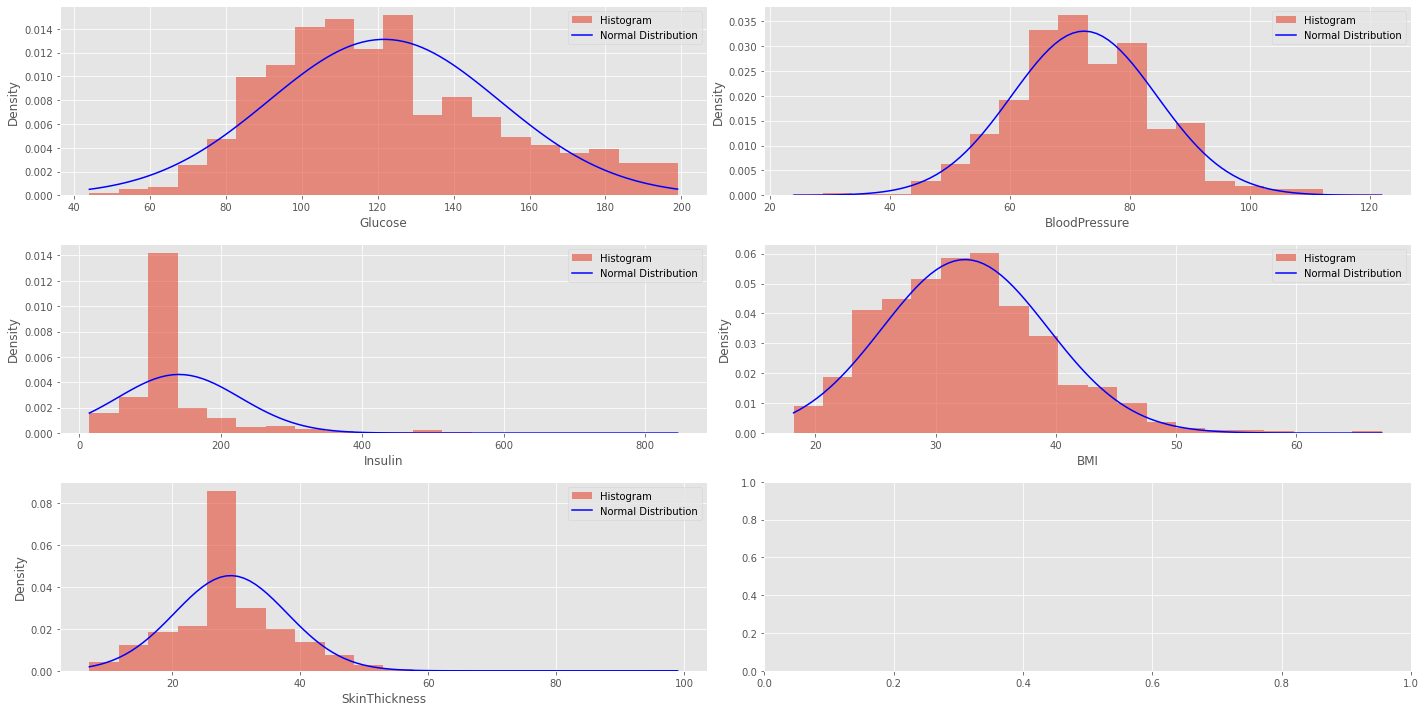

In [224]:
# Check the distribution after handling the missing values
from scipy import stats

# Columns to visualize
columns_to_visualize = columns

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# Loop through the columns to create subplots
for i, column in enumerate(columns_to_visualize):
    # Get the data for the current column
    data = df[column]
    
    # Plot the histogram
    row = i // 2
    col = i % 2
    axes[row, col].hist(data, bins=20, density=True, alpha=0.6, label='Histogram')
    
    # Create a normal distribution curve with the same mean and standard deviation
    mean = data.mean()
    std = data.std()
    x_values = np.linspace(data.min(), data.max(), 100)
    normal_distribution = stats.norm.pdf(x_values, mean, std)
    
    # Plot the normal distribution curve
    axes[row, col].plot(x_values, normal_distribution, color='blue', label='Normal Distribution')
    
    # Set labels and legend
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [225]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Pregnancies has 4 outliers: [15 17 14 14]
BloodPressure has 14 outliers: [ 30. 110. 108. 122.  30. 110. 108. 110.  24.  38. 106. 106. 106. 114.]
SkinThickness has 87 outliers: [45. 47. 11. 47. 11. 10. 60. 13. 13. 54. 51. 56. 14. 13. 50. 44. 12. 46.
 44. 13. 44. 54. 14.  7. 50. 52. 10. 44. 43. 45. 14. 10. 11. 12. 43. 13.
 12. 48. 43. 43.  8. 13. 14. 12. 49. 46. 46. 11.  8. 12. 63. 12. 45. 13.
 48. 13. 10. 45.  7. 52. 49. 43. 14. 47. 99. 46. 11. 50. 45. 14. 13. 13.
 47. 12. 48. 43. 46. 46. 45. 10. 46. 49. 11. 13. 46. 44. 48.]
Insulin has 346 outliers: [ 94. 168.  88. 543. 846. 175. 230.  83.  96. 235. 146. 140. 110. 245.
  54. 192. 207.  70. 240.  82.  36.  23. 300. 342. 304. 110. 142.  38.
 100.  90. 140. 270.  71.  71. 110. 176.  48.  64. 228.  76.  64. 220.
  40. 152. 140.  18.  36. 495.  37. 175.  51. 100. 100.  99.  94. 145.
 168. 225.  49. 140.  50.  92. 325.  63. 284. 204. 155. 485.  94.  53.
 105. 285. 156.  78.  48.  55.  92.  23. 495.  58. 160.  94. 210.  48.
  99. 318.  44. 19

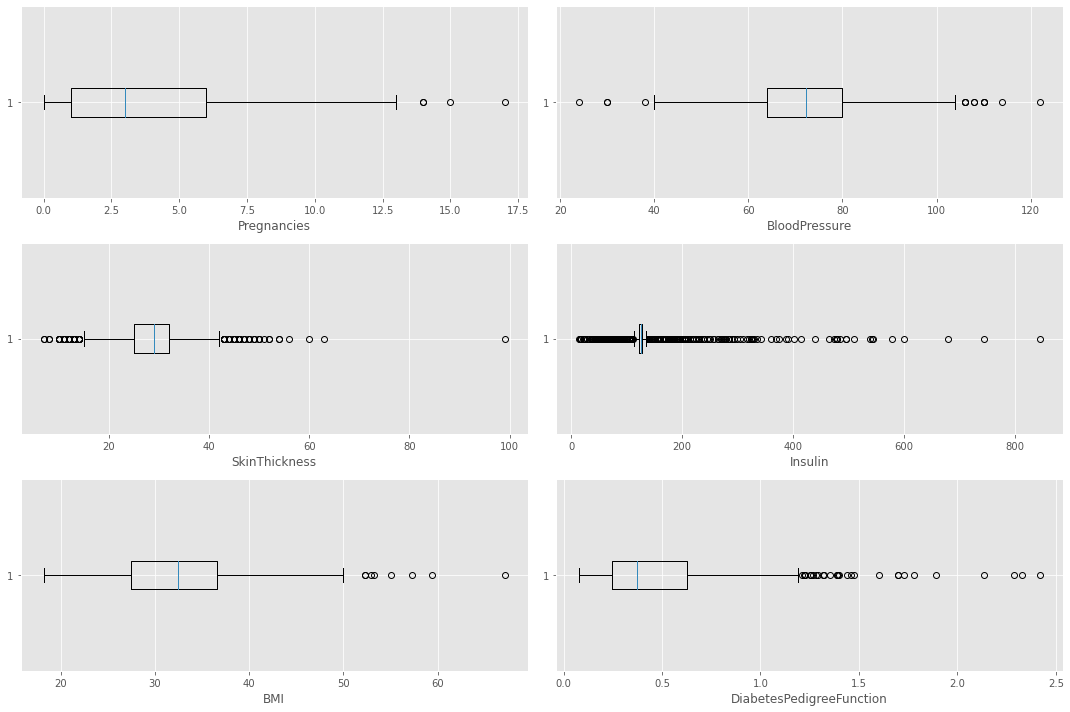

In [226]:
# Columns to visualize to check and visualize outliers
selected_columns = ['Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
columns_to_visualize = selected_columns

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Loop through the columns to create subplots
for i, column in enumerate(columns_to_visualize):
    # Get the data for the current column
    data = df[column]
    
    # Create a boxplot
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(data, vert=False)
    
    # Set labels
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('')
    
    # Identify and handle outliers
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if not outliers.empty:
        print(f"{column} has {len(outliers)} outliers: {outliers.values}")
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


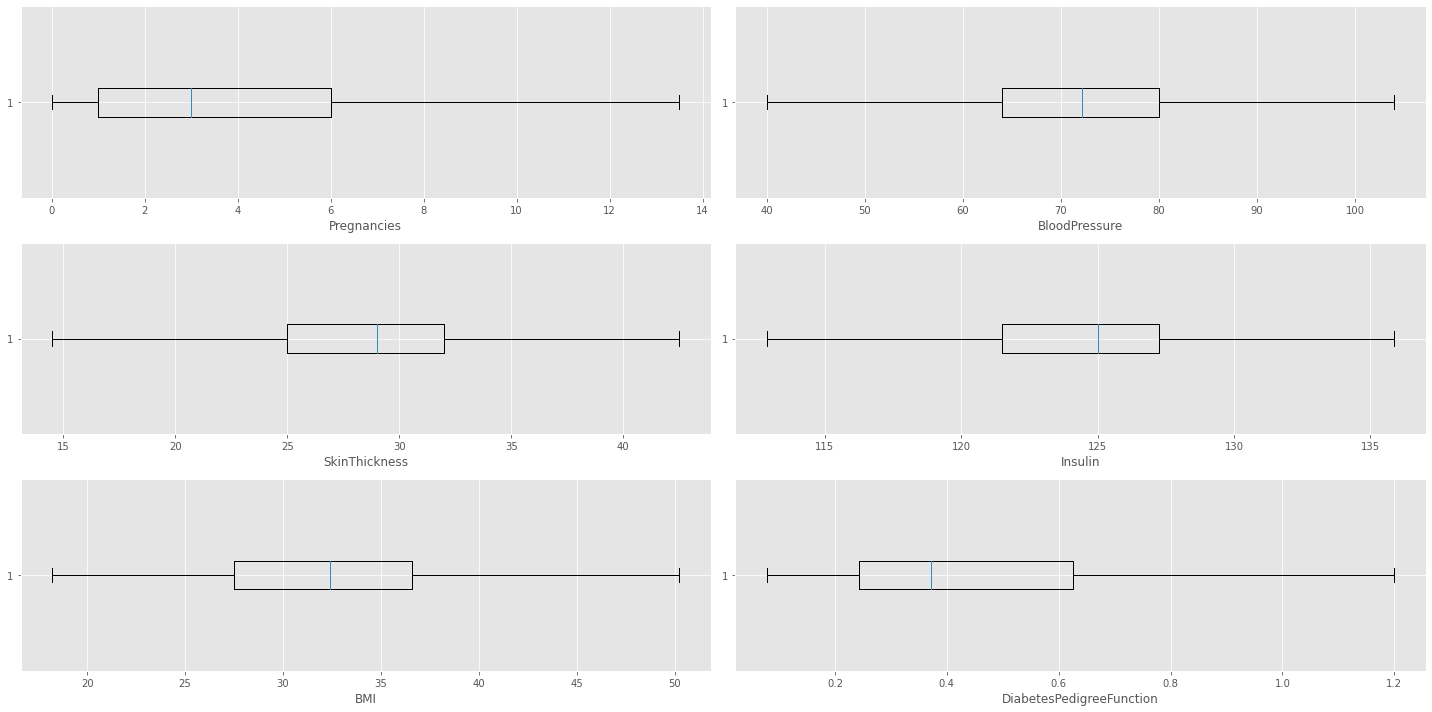

In [227]:
# Columns to visualize
columns_to_visualize = selected_columns

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# Loop through the columns to create subplots
for i, column in enumerate(columns_to_visualize):
    # Get the data for the current column
    data = df[column]
    
    # Replace outliers with median value
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data.clip(lower_bound, upper_bound)
    median = data.median()
    data[(data < lower_bound) | (data > upper_bound)] = median
    
    # Create a boxplot of the data with outliers replaced by median
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(data, vert=False)
    
    # Set labels
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [228]:
df.shape

(768, 9)

In [229]:
# Check for any remaining missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [230]:
# recheck for the summary statistics
df.describe().astype('int')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
count          768      768            768            768      768  768   
mean             3      121             72             29      140   32   
std              3       30             12              8       86    6   
min              0       44             24              7       14   18   
25%              1       99             64             25      121   27   
50%              3      117             72             29      125   32   
75%              6      140             80             32      127   36   
max             17      199            122             99      846   67   

       DiabetesPedigreeFunction  Age  Outcome  
count                       768  768      768  
mean                          0   33        0  
std                           0   11        0  
min                           0   21        0  
25%                           0   24        0  
50%                           0   29        0  
75%                           0   41        1  
max                           2   81        1

## Data Validation and Preprocessing

In [231]:
# select numerical variables
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# print the list of numerical variables
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 136, dtype: int64
BloodPressure
70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
72.405184     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      

In [232]:
# check data types
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [233]:
# confirm if the number of negatives are still in the columns
df_neg = (df < 0).sum()
print(df_neg)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Exploratory Data Analysis

### Univariate Analysis
We will be analyzing the distribution of individual features and visualizing them.

In [234]:
# wrtie a code to put the values of the 'Blood Pressure' into category
def blood_pressure(x):
    if x <= 79:
        return 'Normal'
    elif x <= 89:
        return 'Prehypertension'
    else:
        return 'Hypertension'
df['BloodPressureCategory'] = df['BloodPressure'].apply(blood_pressure)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome BloodPressureCategory  
0                     0.627   50        1                Normal  
1                     0.351   31        0                Normal  
2                     0.672   32        1                Normal  
3                     0.167   21        0                Normal  
4                     2.288   33        1                Normal

In [235]:
# Distribution of Blood Pressure Patients
bp_dist = df['BloodPressureCategory'].value_counts()
bp_dist

BloodPressureCategory
Normal             563
Prehypertension    145
Hypertension        60
Name: count, dtype: int64

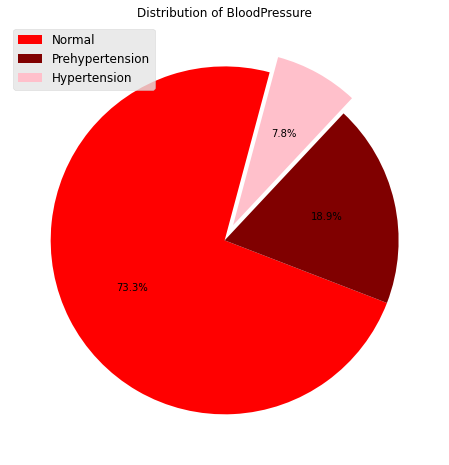

In [236]:
# Set the colors for each slice of the pie chart
colors = ['#FF0000', '#800000', '#FFC0CB']

# Set the explode parameter to highlight certain slices
explode = (0, 0, 0.1)

# Create a figure and axis object with the figsize parameter
fig, ax = plt.subplots(figsize=(10, 8))

# Create a pie chart for the top 3 products purchased by customers
ax.pie(bp_dist, autopct='%1.1f%%', startangle=75, explode=explode, colors = colors)

# add legends
plt.legend(bp_dist.index, loc='upper left', fontsize=12)

# Set the title of the pie chart
plt.title('Distribution of BloodPressure', fontsize=12)

# Show the plot
plt.show()

*It is observed that 73.3% of the female patients have normal blood presure, 18.9% are prehypentensive, and 7.8% have high blood pressure(hypertension) which cooud contribute to the patients having diabetes.*

In [237]:
# wrtie a code to put the values of the 'BMI' into category
def bmi_category(bmi):
    if bmi <= 18.5:
        return 'Underweight'
    elif bmi <= 24.9:
        return 'Normal weight'
    elif bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'
df['BMICategory'] = df['BMI'].apply(bmi_category)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome BloodPressureCategory    BMICategory  
0                     0.627   50        1                Normal          Obese  
1                     0.351   31        0                Normal     Overweight  
2                     0.672   32        1                Normal  Normal weight  
3                     0.167   21        0                Normal     Overweight  
4                     2.288   33        1                Normal          Obese

In [238]:
# distribution of BMI
bmi_dist = df['BMICategory'].value_counts()
bmi_dist

BMICategory
Obese            483
Overweight       179
Normal weight    102
Underweight        4
Name: count, dtype: int64

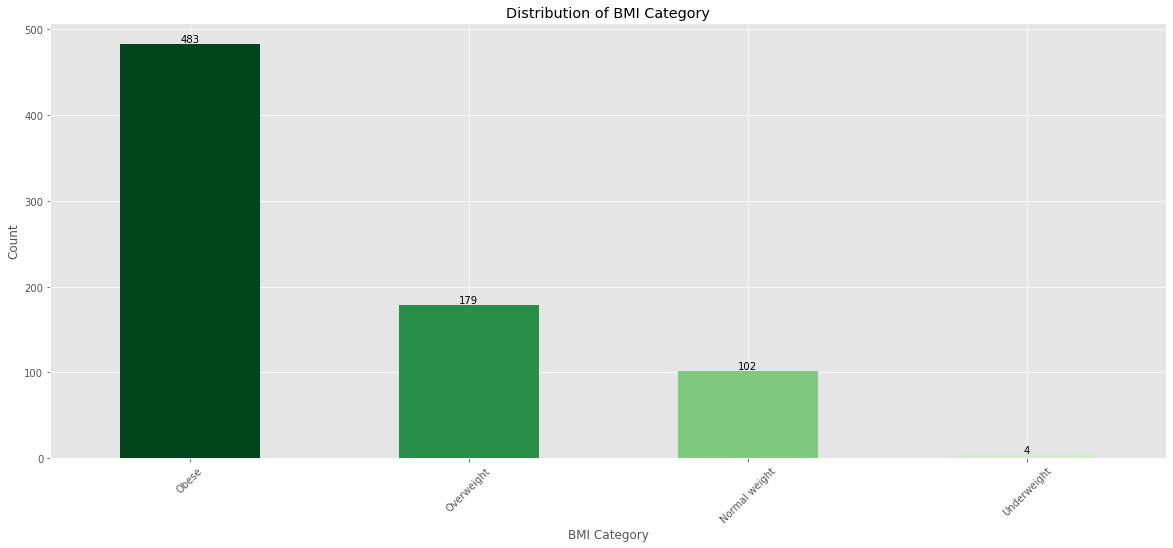

In [239]:
# Create a color map with gradients of blue
cmap = plt.get_cmap('Greens')

# Create a DataFrame with the top 5 customers
bmi_dist = df['BMICategory'].value_counts().nlargest(4)

# Create a bar chart with gradients of blue
ax = bmi_dist.plot.bar(figsize=(20, 8), color=cmap(np.linspace(1, 0.2, len(bmi_dist))))

# Set the title and axis labels
plt.title('Distribution of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Show the plot
plt.show()


*These numbers indicate that a large proportion of the population falls into the overweight and obese categories, with 472 individuals being classified as obese, and 179 as overweight. This is a concerning trend as obesity is a risk factor for several health conditions such as diabetes, heart disease, and stroke.*

In [240]:
preg_dist = df['Pregnancies'].value_counts()
preg_dist

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

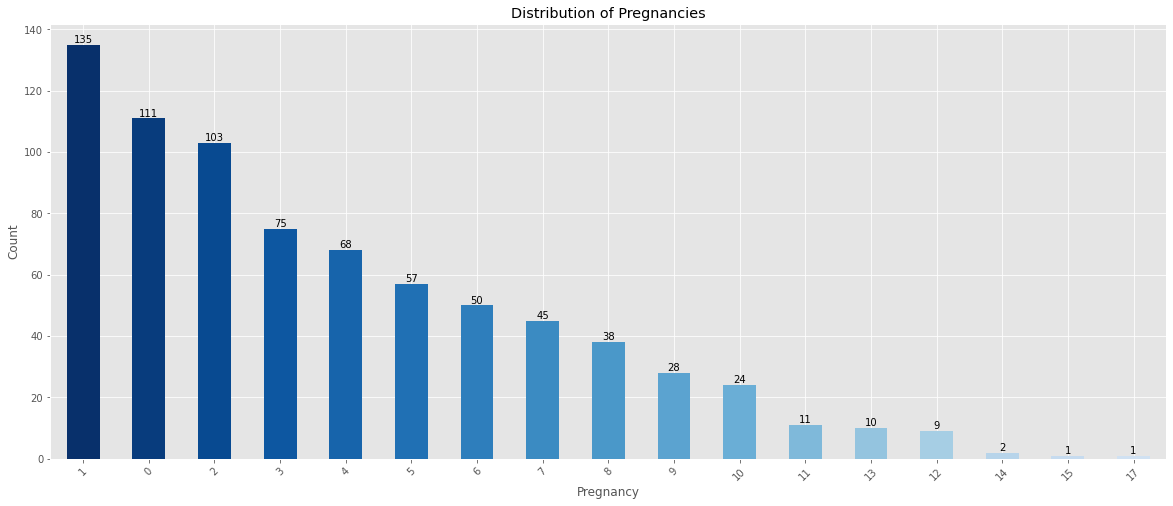

In [241]:
# Create a color map with gradients of blue
cmap = plt.get_cmap('Blues')

# Create a DataFrame with the top 5 customers
preg_dist = df['Pregnancies'].value_counts().nlargest(20)

# Create a bar chart with gradients of blue
ax = preg_dist.plot.bar(figsize=(20, 8), color=cmap(np.linspace(1, 0.2, len(preg_dist))))

# Set the title and axis labels
plt.title('Distribution of Pregnancies')
plt.xlabel('Pregnancy')
plt.ylabel('Count')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Show the plot
plt.show()


*It shows that the majority of individuals have had between 0 and 3 pregnancies, with the number of individuals decreasing as the number of pregnancies increases. However, it is interesting to note that there are a few individuals who have had a large number of pregnancies (e.g., one individual with 17 pregnancies). This could be due to cultural or social factors, or it could be due to personal choice.*

In [242]:
# distribution of age
df['Age'].describe().astype('int')

count    768
mean      33
std       11
min       21
25%       24
50%       29
75%       41
max       81
Name: Age, dtype: int32

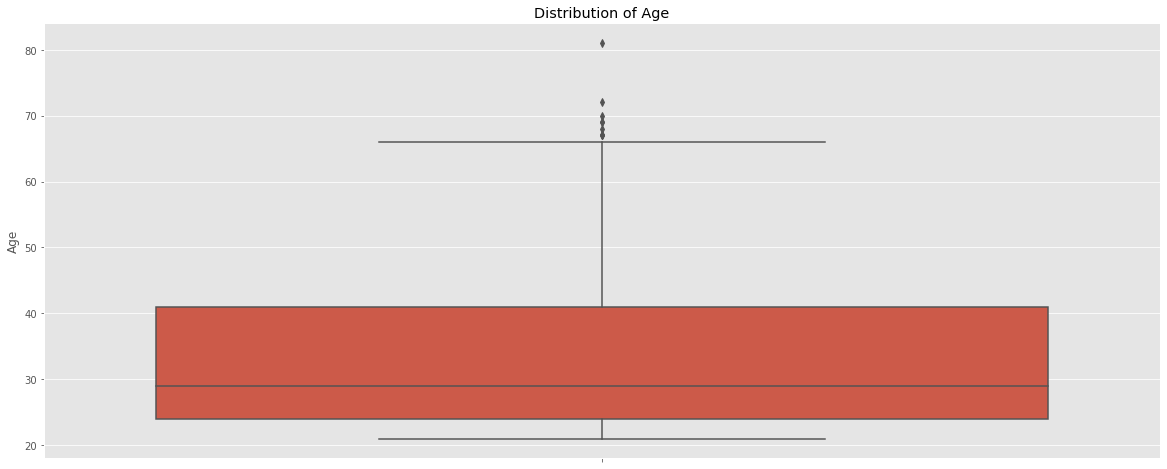

In [243]:
# Create a box plot showing the distribution of age
plt.figure(figsize = (20, 8))
sns.boxplot(y = df['Age'], data = df)
plt.title('Distribution of Age')
plt.show()

*It shows that the female individuals have a wide range of ages, `with the youngest being 21 and the oldest being 81`. The mean age is 33, indicating that the female patients is relatively young on average. The standard deviation of 11 indicates that there is some variability in the age distribution, with some individuals being much older or younger than the mean. The quartile values show that 50% of the female individuals are between the ages of 24 and 41, with the remaining 50% falling outside this range. The interquartile range (IQR), which is the difference between the 25th and 75th percentiles, is 17. This indicates that the middle 50% of female individuals have an age range of 17 years.*

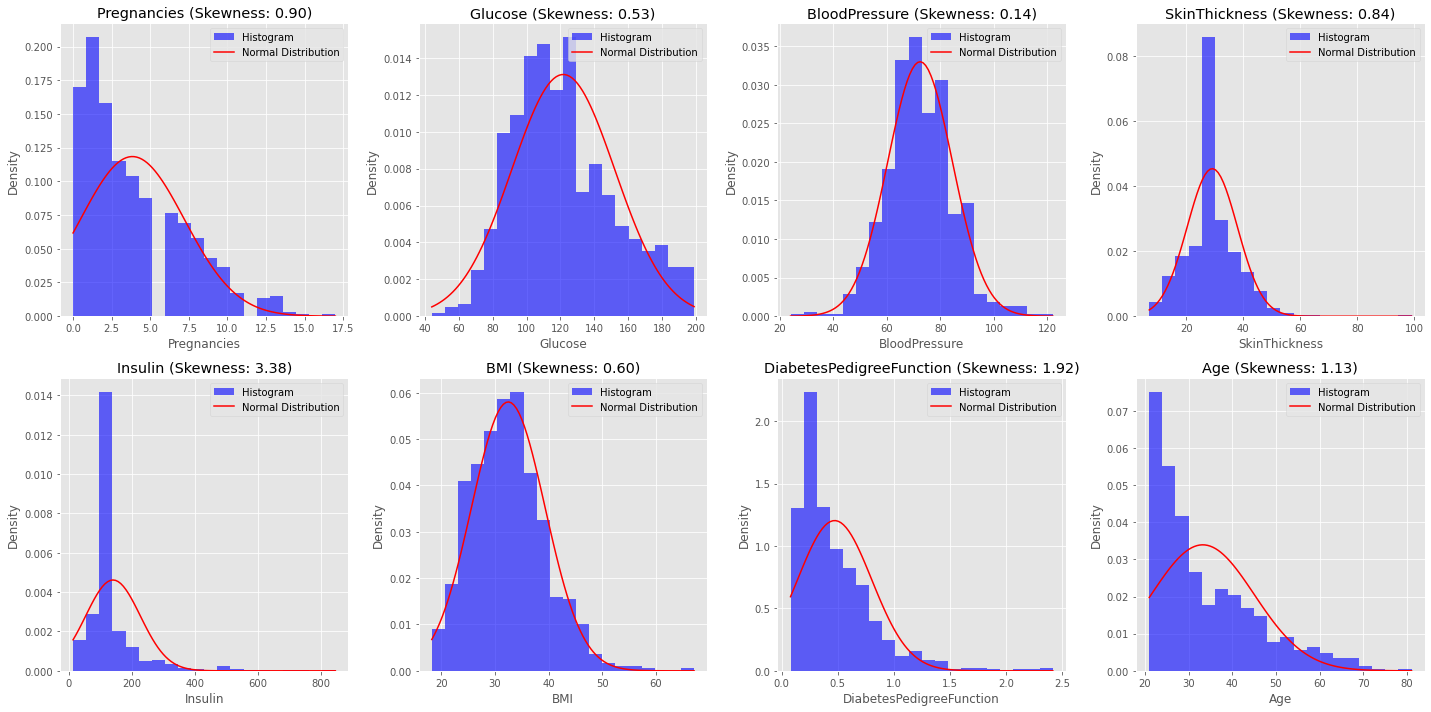

In [244]:
from scipy import stats

# Columns to visualize
columns_to_visualize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                         'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Loop through the columns to create subplots
for i, column in enumerate(columns_to_visualize):
    # Get the data for the current column
    data = df[column]
    
    # Calculate skewness
    skewness = data.skew()
    
    # Plot the histogram
    row = i // 4
    col = i % 4
    axes[row, col].hist(data, bins=20, density=True, alpha=0.6, color='blue', label='Histogram')
    
    # Create a normal distribution curve with the same mean and standard deviation
    mean = data.mean()
    std = data.std()
    x_values = np.linspace(data.min(), data.max(), 100)
    normal_distribution = stats.norm.pdf(x_values, mean, std)
    
    # Plot the normal distribution curve
    axes[row, col].plot(x_values, normal_distribution, color='red', label='Normal Distribution')
    
    # Set title and labels
    axes[row, col].set_title(f'{column} (Skewness: {skewness:.2f})')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')
    
    # Add a legend
    axes[row, col].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


This shows that the individuals in the dataset are females between the ages of 20 and 30. 

The 'Glucose' levels exhibit a normal distribution, which is expected as glucose levels are typically regulated by the body. However, it is important to note that high glucose levels can be indicative of diabetes or other health conditions.

There is an unusual 'SkinThickness' value of 99, which stands out from the rest of the data and may be an outlier. It is important to investigate this value further to determine whether it is a valid data point or whether it should be removed from the dataset.

The 'Insulin' column contains outliers in the range of 700 to 800, but these levels are possible and valid, so they are not removed from the dataset.

The 'BloodPressure' column shows a standard normal distribution with a mean blood pressure of 70mmHg. 

Most of the female patients in the dataset have a diabetes pedigree between 0.2 and 0.5, indicating that there may be a genetic component to their risk of developing diabetes. However, it is important to note that other factors such as lifestyle and environmental factors can also play a role in diabetes risk.



In [245]:
# wrtie a code to put the values of the 'DiabetesOutcome' into category
def diabetes_outcome(x):
    if x == 1:
        return 'Diabetic'
    else:
        return 'Non-Diabetics'
df['DiabetesOutcome'] = df['Outcome'].apply(diabetes_outcome)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome BloodPressureCategory  \
0                     0.627   50        1                Normal   
1                     0.351   31        0                Normal   
2                     0.672   32        1                Normal   
3                     0.167   21        0                Normal   
4                     2.288   33        1                Normal   

     BMICategory DiabetesOutcome  
0          Obese        Diabetic  
1     Overweight   Non-Diabetics  
2  Normal weight        Diabetic  
3     Overweight   Non-Diabetics  
4          Obese        Diabetic

In [246]:
# distribution of diabetes_outcome
diabetes_dist = df['DiabetesOutcome'].value_counts()
diabetes_dist

DiabetesOutcome
Non-Diabetics    500
Diabetic         268
Name: count, dtype: int64

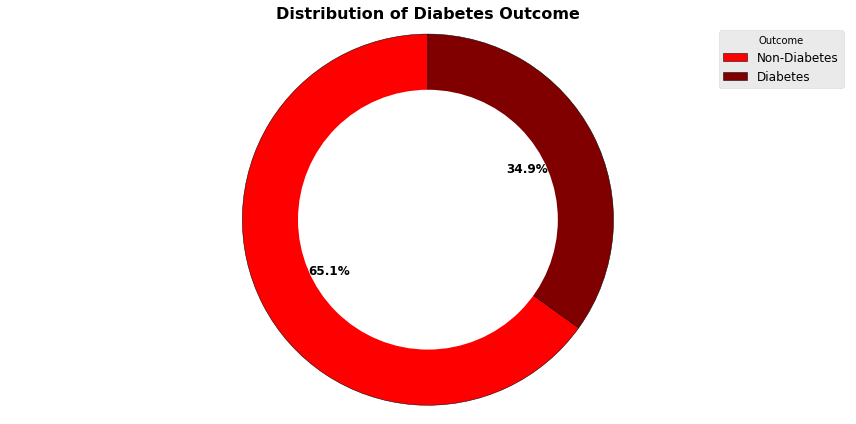

In [247]:
# Data
diabetes_dist = df['DiabetesOutcome'].value_counts()
labels = diabetes_dist.index
sizes = diabetes_dist.values
colors = ['#FF0000', '#800000', '#FFC0CB'] # Custom colors for the slices

# Create a figure and axis
fig, ax = plt.subplots(figsize = (12, 6))

# Create a pie chart with custom colors
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Add black edges to the slices
    textprops={'fontsize': 12, 'fontweight': 'bold'}  # Customize text properties
)

# Draw a white circle in the center to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')

# Set the title and adjust its properties
ax.set_title('Distribution of Diabetes Outcome', fontsize=16, fontweight='bold')

# Customize legend
legend_labels = ['Non-Diabetes', 'Diabetes']  # Match the labels to the data
ax.legend(wedges, legend_labels, title='Outcome', loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

*This indicates that the non-diabetic population constitutes 65.1% of the entire dataset, while the diabetic population constitutes 34.9%.*

## Bivariate Analysis
Bivariate analysis: We will be analyzing the relationship between two variables and visualizing them. This can help us understand how the variables are related to each other and identify potential patterns or trends in the data. For example, we might analyze the relationship between Glucose levels and Diabetes outcome, or between BMI and Age.

In [248]:
# pregnancies by diabetes
diabete_preg = df.groupby('DiabetesOutcome')['Pregnancies'].sum()
diabete_preg

DiabetesOutcome
Diabetic         1304
Non-Diabetics    1649
Name: Pregnancies, dtype: int64

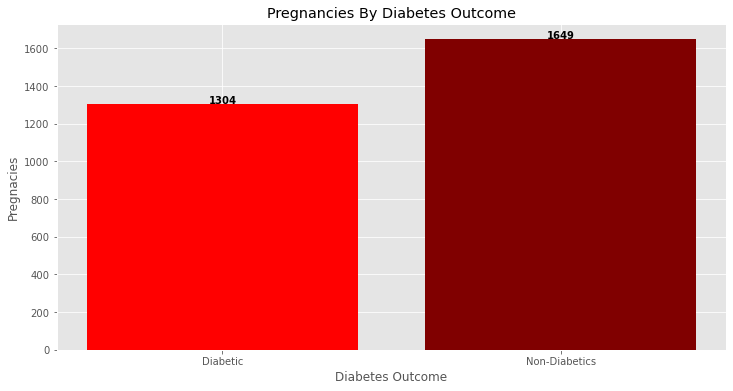

In [249]:
# Define a color map with a gradient of red shades
colors = ['#FF0000', '#800000']

# Plot the bar chart with varying gradient color bars
plt.figure(figsize = (12, 6))
plt.bar(diabete_preg.index, diabete_preg.values, color=colors)

# Add data labels to the chart
for i, v in enumerate(diabete_preg.values):
    plt.text(i, v+5, str(v), ha='center', fontweight='bold')

# Set the title and labels for the chart
plt.title('Pregnancies By Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Pregnacies')

# Display the chart
plt.show()


*It appears that there were 1304 individuals who were diagnosed with diabetes (Diabetic) and 1649 individuals who were not diagnosed with diabetes (Non-Diabetics) in the sample population.*

In [250]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'BloodPressureCategory', 'BMICategory', 'DiabetesOutcome'],
      dtype='object')

In [251]:
# Age of patient by BMI category
age_bmi = df.groupby('BMICategory')['Age'].describe().round(1)
age_bmi

count  mean   std   min   25%   50%   75%   max
BMICategory                                                   
Normal weight  102.0  31.9  13.3  21.0  22.0  26.0  36.8  72.0
Obese          483.0  33.7  11.0  21.0  25.0  30.0  41.0  70.0
Overweight     179.0  32.9  12.8  21.0  23.0  29.0  38.0  81.0
Underweight      4.0  24.0   3.5  21.0  21.0  24.0  27.0  27.0

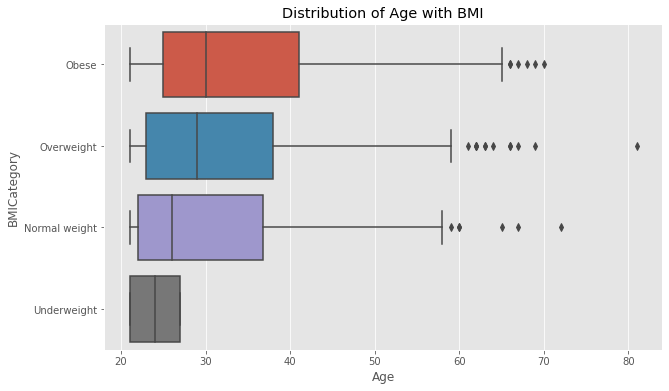

In [252]:
# distribution of age with BMI Category
plt.figure(figsize= (10, 6))
sns.boxplot(df, x = 'Age', y = 'BMICategory')
plt.title('Distribution of Age with BMI')
plt.show()

*It appears that the mean Age for the BMI is highest for the Obese category (33.8), followed by the Overweight category (32.9), Normal weight category (31.9), and Underweight category (28.7). However, the age standard deviation is also highest for the Obese category (10.9), indicating greater variability in Age for the BMI within this group.*

*The table also shows that the minimum Age for the BMI value is 21.0 for all categories, while the maximum Age for the BMI values vary from 70.0 for the Obese category to 81.0 for the Overweight category. The median Age for the BMI values are relatively consistent across categories, ranging from 26.0 to 30.0.*

In [253]:
# Age of patient by BMI category
age_bp = df.groupby('BloodPressureCategory')['Age'].describe().round(1)
age_bp

count  mean   std   min   25%   50%   75%   max
BloodPressureCategory                                                 
Hypertension            60.0  39.8  12.6  21.0  28.8  40.0  47.2  66.0
Normal                 563.0  31.7  10.9  21.0  23.0  28.0  38.0  81.0
Prehypertension        145.0  36.7  13.0  21.0  26.0  34.0  46.0  70.0

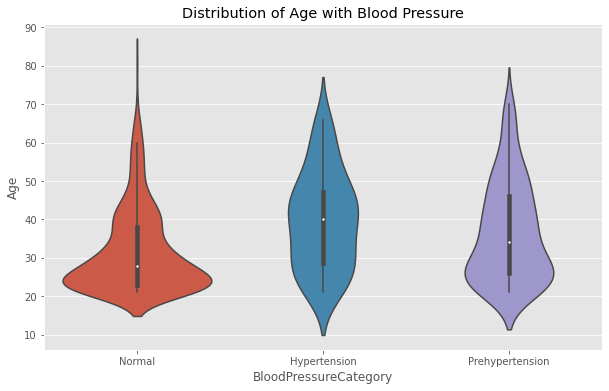

In [254]:
# distribution of age with Blood Pressure Category
plt.figure(figsize= (10, 6))
sns.violinplot(df, y = 'Age', x = 'BloodPressureCategory')
plt.title('Distribution of Age with Blood Pressure')
plt.show()


*It appears that the mean age is highest for the Hypertension category (39.8), followed by the Prehypertension category (36.7) and the Normal category (31.7). The standard deviation is also highest for the Hypertension category (12.6), indicating greater variability in age within this group.*

*The chart also shows that the minimum age value is 21.0 for all categories, while the maximum age values vary from 66.0 for the Hypertension category to 81.0 for the Normal category. The median age values are relatively consistent across categories, ranging from 28.0 to 40.0*

In [255]:
# Distribution of Insulin by Diabetes Outcome
insulin_diabetes = df.groupby('DiabetesOutcome')[['Insulin', 'Age']].describe().round(1)
insulin_diabetes

Insulin                                                  \
                  count   mean    std   min    25%    50%    75%    max   
DiabetesOutcome                                                           
Diabetic          268.0  164.7  100.9  14.0  125.0  125.0  167.2  846.0   
Non-Diabetics     500.0  127.8   74.4  15.0   95.0  125.0  125.0  744.0   

                   Age                                            
                 count  mean   std   min   25%   50%   75%   max  
DiabetesOutcome                                                   
Diabetic         268.0  37.1  11.0  21.0  28.0  36.0  44.0  70.0  
Non-Diabetics    500.0  31.2  11.7  21.0  23.0  27.0  37.0  81.0

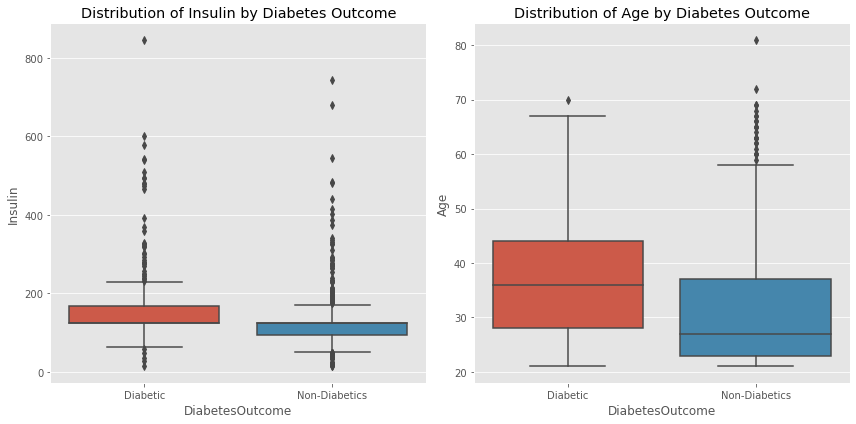

In [256]:
# distribution of Insuline by Diabetes Outcome, and Age by Diabetes Outcome
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

sns.boxplot(data=df, x='DiabetesOutcome', y='Insulin', ax=axs[0])
axs[0].set_title('Distribution of Insulin by Diabetes Outcome')

sns.boxplot(data=df, x='DiabetesOutcome', y='Age', ax=axs[1])
axs[1].set_title('Distribution of Age by Diabetes Outcome')

plt.tight_layout()
plt.show()


*The data shows that both the diabetic and non-diabetic patients in the dataset have a minimum age of 21. However, the average age of the diabetic patients is higher at 36 years old compared to the non-diabetic patients who have an average age of 27 years old.*

*Additionally, the majority of diabetic patients have insulin levels above the average value of 195, which is a cause for concern as it indicates a higher risk for health complications. It is important to monitor insulin levels in diabetic patients to ensure that they are receiving appropriate treatment and care. Having insulin levels above the average value of 195 can indicate a higher risk for health complications, particularly for individuals with diabetes. High insulin levels can lead to insulin resistance, which can increase the risk of developing type 2 diabetes, heart disease, and other health conditions*

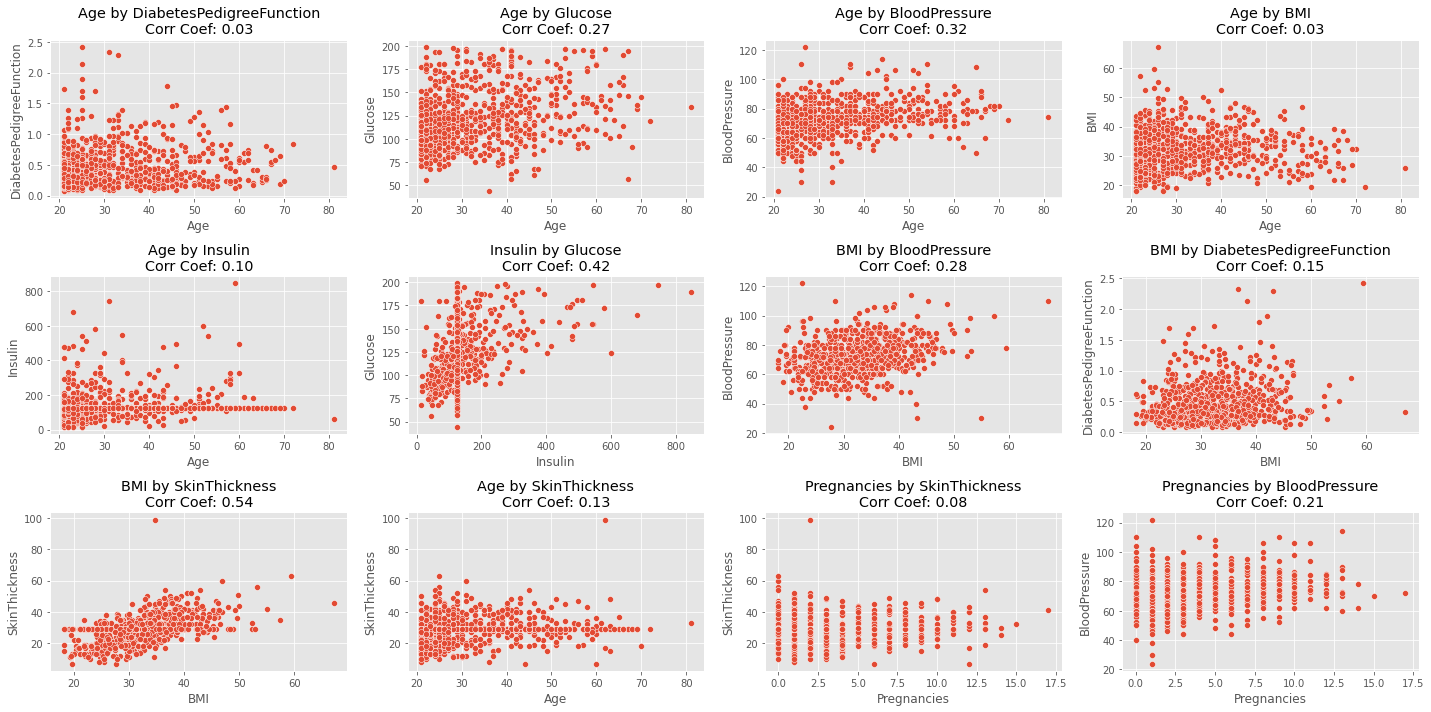

In [257]:
# Relationship between the pair of factors causing diabetes

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

# Scatter plot: Age by DiabetesPedigreeFunction
sns.scatterplot(ax=axes[0, 0], data=df, x='Age', y='DiabetesPedigreeFunction')
corr_coef = np.corrcoef(df['Age'], df['DiabetesPedigreeFunction'])[0, 1]
axes[0, 0].set_title(f'Age by DiabetesPedigreeFunction\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Age by Glucose
sns.scatterplot(ax=axes[0, 1], data=df, x='Age', y='Glucose')
corr_coef = np.corrcoef(df['Age'], df['Glucose'])[0, 1]
axes[0, 1].set_title(f'Age by Glucose\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Age by BloodPressure
sns.scatterplot(ax=axes[0, 2], data=df, x='Age', y='BloodPressure')
corr_coef = np.corrcoef(df['Age'], df['BloodPressure'])[0, 1]
axes[0, 2].set_title(f'Age by BloodPressure\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Age by BMI
sns.scatterplot(ax=axes[0, 3], data=df, x='Age', y='BMI')
corr_coef = np.corrcoef(df['Age'], df['BMI'])[0, 1]
axes[0, 3].set_title(f'Age by BMI\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Age by Insulin
sns.scatterplot(ax=axes[1, 0], data=df, x='Age', y='Insulin')
corr_coef = np.corrcoef(df['Age'], df['Insulin'])[0, 1]
axes[1, 0].set_title(f'Age by Insulin\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Insulin by Glucose
sns.scatterplot(ax=axes[1, 1], data=df, x='Insulin', y='Glucose')
corr_coef = np.corrcoef(df['Insulin'], df['Glucose'])[0, 1]
axes[1, 1].set_title(f'Insulin by Glucose\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: BMI by BloodPressure
sns.scatterplot(ax=axes[1, 2], data=df, x='BMI', y='BloodPressure')
corr_coef = np.corrcoef(df['BMI'], df['BloodPressure'])[0, 1]
axes[1, 2].set_title(f'BMI by BloodPressure\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: BMI by DiabetesPedigreeFunction
sns.scatterplot(ax=axes[1, 3], data=df, x='BMI', y='DiabetesPedigreeFunction')
corr_coef = np.corrcoef(df['BMI'], df['DiabetesPedigreeFunction'])[0, 1]
axes[1, 3].set_title(f'BMI by DiabetesPedigreeFunction\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: BMI by SkinThickness
sns.scatterplot(ax=axes[2, 0], data=df, x='BMI', y='SkinThickness')
corr_coef = np.corrcoef(df['BMI'], df['SkinThickness'])[0, 1]
axes[2, 0].set_title(f'BMI by SkinThickness\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Age by SkinThickness
sns.scatterplot(ax=axes[2, 1], data=df, x='Age', y='SkinThickness')
corr_coef = np.corrcoef(df['Age'], df['SkinThickness'])[0, 1]
axes[2, 1].set_title(f'Age by SkinThickness\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Pregnancies by SkinThickness
sns.scatterplot(ax=axes[2, 2], data=df, x='Pregnancies', y='SkinThickness')
corr_coef = np.corrcoef(df['Pregnancies'], df['SkinThickness'])[0, 1]
axes[2, 2].set_title(f'Pregnancies by SkinThickness\nCorr Coef: {corr_coef:.2f}')

# Scatter plot: Pregnancies by BloodPressure
sns.scatterplot(ax=axes[2, 3], data=df, x='Pregnancies', y='BloodPressure')
corr_coef = np.corrcoef(df['Pregnancies'], df['BloodPressure'])[0, 1]
axes[2, 3].set_title(f'Pregnancies by BloodPressure\nCorr Coef: {corr_coef:.2f}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


1. There is a slightly positive correlation between age and diabetes pedigree function, as the majority of patients have a value less than 1.
2. The majority of patients with high glucose levels are under the age of 50.
3. Patients with a BMI between 20 and 50 are significantly affected by blood pressure, indicating that a majority of individuals in this range are obese and at risk for high blood pressure.
4. Most obese patients have a BMI above 20 and are between the ages of 30 and 50.
5. There is a strong positive correlation between BMI and skin thickness, indicating that patients with a BMI above 30 tend to have thicker skin.
6. Age has little effect on insulin levels, as most patients under the age of 40 have insulin levels below 150, except for a few patients over the age of 65 with levels below 50.
7. There is a strong positive correlation between glucose and insulin levels, indicating that patients with high insulin levels consume a large amount of glucose.
8. There is a weak positive correlation between BMI and blood pressure, and patients with a BMI between 20 and 40, indicating that obese patients in this range are at risk for high blood pressure.

In [258]:
 # pregnancies vs bmicategory 
preg_bmi = df.groupby('BMICategory')['Pregnancies'].sum().sort_values()
preg_bmi

BMICategory
Underweight         3
Normal weight     331
Overweight        679
Obese            1940
Name: Pregnancies, dtype: int64

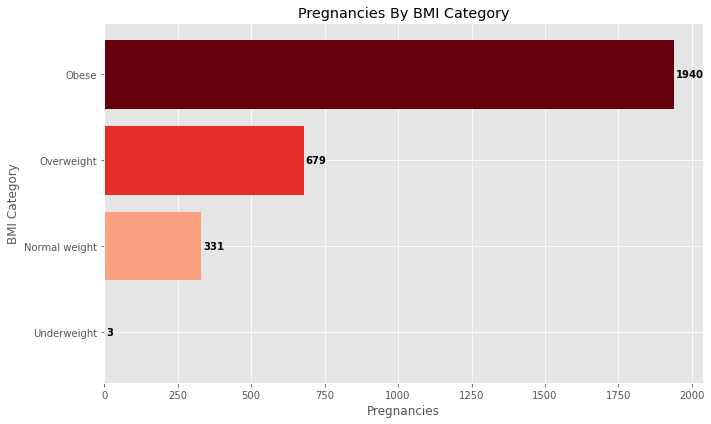

In [259]:
# Define a color map with a gradient of red shades
colors = plt.cm.Reds(np.linspace(0, 1, len(preg_bmi)))

# Plot the horizontal bar chart with varying gradient color bars
plt.figure(figsize = (10, 6))
plt.barh(preg_bmi.index, preg_bmi.values, color=colors)

# Add data labels to the chart
for i, v in enumerate(preg_bmi.values):
    plt.text(v+5, i, str(v), va='center', fontweight='bold')

# Set the title and labels for the chart
plt.title('Pregnancies By BMI Category')
plt.xlabel('Pregnancies')
plt.ylabel('BMI Category')

plt.tight_layout()
plt.show()


*The horizontal bar chart reveals that the majority of pregnant patients fall into the obese category, with a total of 1897 pregnancies. This is followed by the underweight category, which has a total of 679 pregnancies. The least represented category is the extremely underweight category, with only 46 pregnancies.*

In [260]:
# pregnancies vs bloodpressure
preg_bp = df.groupby('BloodPressureCategory')['Pregnancies'].sum().sort_values()
preg_bp

BloodPressureCategory
Hypertension        287
Prehypertension     627
Normal             2039
Name: Pregnancies, dtype: int64

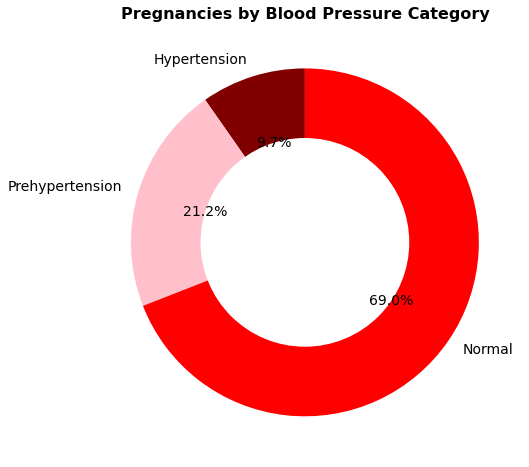

In [261]:
# Define the data labels and colors
labels = preg_bp.index
sizes = preg_bp.values
colors = ['#800000', '#FFC0CB', '#FF0000'] 

# Create the pie chart with customizations
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

# Add a circle at the center to make it a donut chart
circle = plt.Circle(xy=(0, 0), radius=0.6, facecolor='white')
ax.add_artist(circle)

# Set the title for the chart
ax.set_title('Pregnancies by Blood Pressure Category', fontsize=16, fontweight='bold')

# Display the chart
plt.show()


*The patients with normal blood pressure have the highest number of pregnancies, accounting for approximately 69.0% of the total sample population. On the other hand, patients with hypertension have the lowest number of pregnancies, contributing to only about 9.7% of the total sample population.*

In [262]:
# age vs bmicategory
age_bmicat = df.groupby('BMICategory')['Age'].mean()
age_bmicat

BMICategory
Normal weight    31.892157
Obese            33.734990
Overweight       32.882682
Underweight      24.000000
Name: Age, dtype: float64

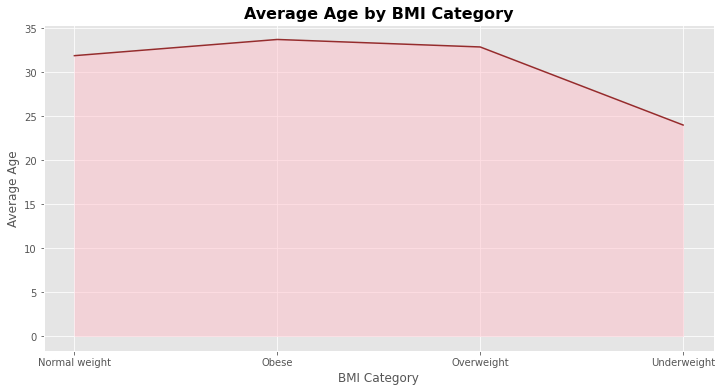

In [263]:
# Create a numpy array for the x-axis data
x = np.arange(len(age_bmicat))

# Create the area chart with customizations
plt.figure(figsize=(12, 6))
plt.fill_between(x, age_bmicat.values, color='#FFC0CB', alpha=0.5)
plt.plot(x, age_bmicat.values, color='#800000', alpha=0.8)

# Set the x-axis tick labels to the BMI categories
plt.xticks(x, age_bmicat.index)

# Set the title and labels for the chart
plt.title('Average Age by BMI Category', fontsize=16, fontweight='bold')
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average Age', fontsize=12)

# Display the chart
plt.show()


*The category with the highest average age is "Obese" at 33.8 years old, followed by "Overweight" at an average of 32.7 years old. The category with the lowest average age is "Underweight" at approximately 24 years old.*

In [264]:
#  age vs diabetesoutome
age_diabetescat = df.groupby('DiabetesOutcome')['Age'].mean().round(1)
age_diabetescat

DiabetesOutcome
Diabetic         37.1
Non-Diabetics    31.2
Name: Age, dtype: float64

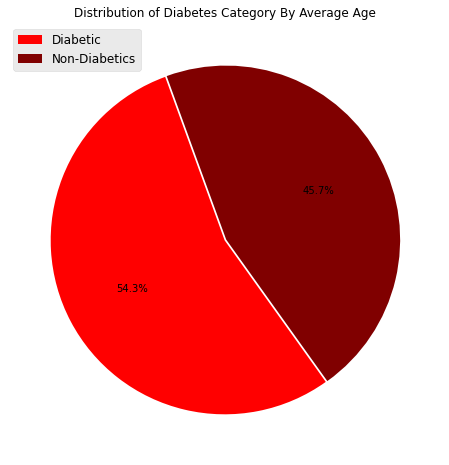

In [265]:
# Set the colors for each slice of the pie chart
colors = ['#FF0000', '#800000']

# Set the explode parameter to highlight certain slices
explode = (0, 0.01)

# Create a figure and axis object with the figsize parameter
fig, ax = plt.subplots(figsize=(10, 8))

# Create a pie chart for the top 3 products purchased by customers
ax.pie(age_diabetescat, autopct='%1.1f%%', startangle=110, explode=explode, colors = colors)

# add legends
plt.legend(age_diabetescat.index, loc='upper left', fontsize=12)

# Set the title of the pie chart
plt.title('Distribution of Diabetes Category By Average Age', fontsize=12)

# Show the plot
plt.show()

*This data shows that 54.3% of individuals in the age category are diabetic, while 45.7% are not diabetic.*

In [266]:
# pregnancies vs diabetesoutcome
preg_diabetescat = df.groupby('DiabetesOutcome')['Pregnancies'].describe().round()
preg_diabetescat

count  mean  std  min  25%  50%  75%   max
DiabetesOutcome                                            
Diabetic         268.0   5.0  4.0  0.0  2.0  4.0  8.0  17.0
Non-Diabetics    500.0   3.0  3.0  0.0  1.0  2.0  5.0  13.0

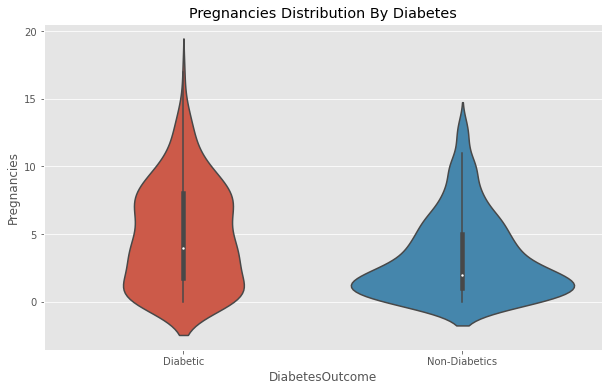

In [267]:
# pregnancies by Diabetes outcome
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'DiabetesOutcome', y = 'Pregnancies', data = df)
plt.title('Pregnancies Distribution By Diabetes')
plt.show()

*The data shows that diabetic patients have a higher average number of pregnancies, at 5, compared to non-diabetic patients whose average number of pregnancies is 3. The highest number of pregnancies was recorded in a diabetic patient, with a total value of 17. This suggests that this patient was at a higher risk of developing diabetes, which could lead to further health complications.*

In [268]:
#  insuline vs diabetesoutcome
insulin_diabetescat = df.groupby('DiabetesOutcome')['Insulin'].describe().round(1)
insulin_diabetescat

count   mean    std   min    25%    50%    75%    max
DiabetesOutcome                                                       
Diabetic         268.0  164.7  100.9  14.0  125.0  125.0  167.2  846.0
Non-Diabetics    500.0  127.8   74.4  15.0   95.0  125.0  125.0  744.0

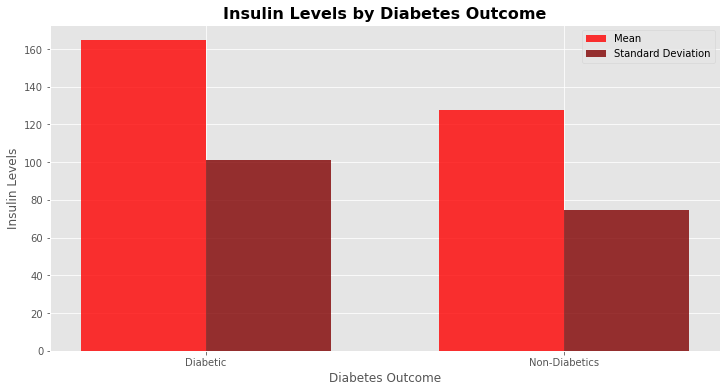

In [269]:
# Create the grouped bar chart with customizations
plt.figure(figsize=(12, 6))
bar_width = 0.35
opacity = 0.8
index = np.arange(len(insulin_diabetescat))

plt.bar(index, insulin_diabetescat['mean'], bar_width, color='#FF0000', alpha=opacity, label='Mean')
plt.bar(index + bar_width, insulin_diabetescat['std'], bar_width, color='#800000', alpha=opacity, label='Standard Deviation')

# Set the title and labels for the chart
plt.title('Insulin Levels by Diabetes Outcome', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Outcome', fontsize=12)
plt.ylabel('Insulin Levels', fontsize=12)
plt.xticks(index + bar_width/2, insulin_diabetescat.index)

# Add the legend to the chart
plt.legend()

# Display the chart
plt.show()

On average, diabetic patients have an insulin level of 195.4, with a variability of 85 from the average. In comparison, non-diabetic patients have an average insulin level of 125.9, with a variability of 106 from the average.

*This information indicates that, on average, diabetic patients have higher insulin levels than non-diabetic patients. Additionally, the variability in insulin levels is lower for diabetic patients than for non-diabetic patients. These findings suggest that insulin levels could be a useful indicator for predicting diabetes, as higher insulin levels may be an early warning sign of the condition.*

C:\Users\user\AppData\Local\Temp\ipykernel_17552\2979141582.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue= 'DiabetesOutcome', ax=axes, fill=True)


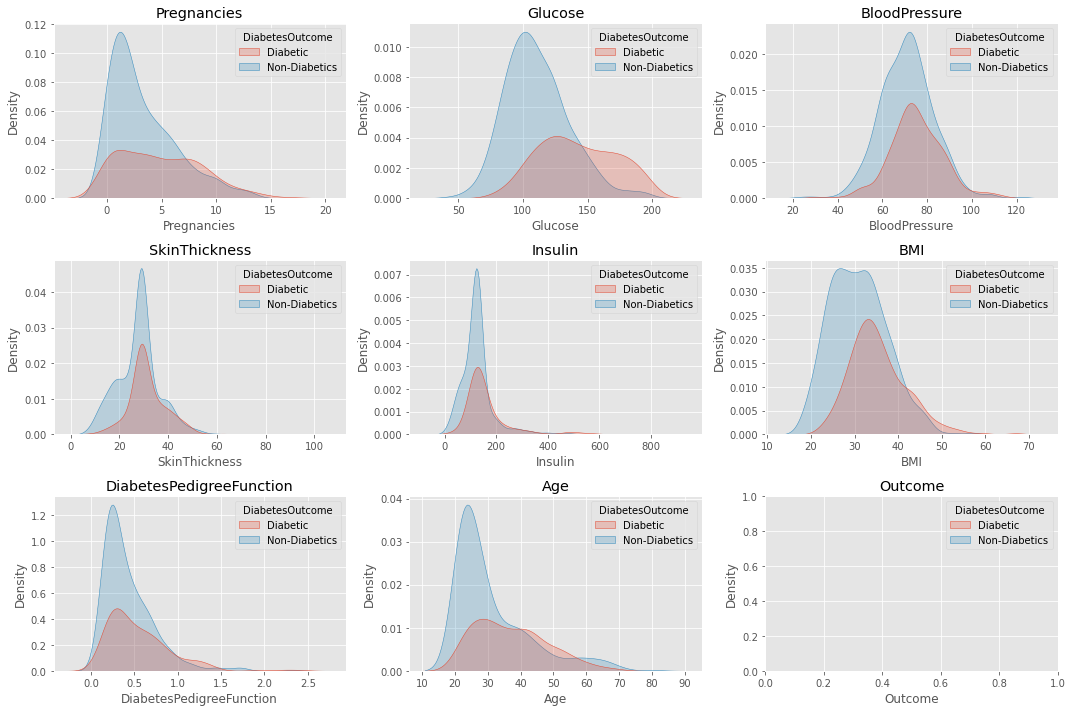

In [270]:
# checking the distribution of Independent Variables
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=(15,10))

# Flatten the axes array to simplify indexing
ax = ax.flatten()

#Itrating over each column and corresponding axes
for i, (col,axes) in enumerate(zip(df.columns, ax)):
  # Plot the KDE plot for the current column using seaborn with 'hue' parameter
  sns.kdeplot(data=df, x=col, hue= 'DiabetesOutcome', ax=axes, fill=True)
  axes.set_title(col) # setting the column name as given

# adjust the spacing between subplots
fig.tight_layout()
plt.show()

1. Age and Diabetes: Individuals under the age of 40 have a significantly lower risk of being diagnosed with diabetes compared to older individuals. 

    Implication: Age is a significant risk factor for diabetes, and younger individuals should be encouraged to maintain healthy lifestyle habits to reduce their risk of developing the condition.

2. Blood Pressure and Diabetes: Maintaining a blood pressure below 110 can lower the risk of developing diabetes.

    Implication: High blood pressure is a risk factor for diabetes, and controlling blood pressure through lifestyle changes or medication can help reduce the risk of developing the condition.

3. Glucose and Diabetes (for Females): Females with a glucose level below 140 mg/dL have a lower risk of developing diabetes.

    Implication: Elevated glucose levels are a risk factor for diabetes, and females with glucose levels below 140 mg/dL should continue to maintain healthy lifestyle habits to reduce their risk of developing the condition.

4. Insulin and Diabetes (for Females): Females with an insulin level below 60 mg/dL have a lower risk of developing diabetes.

    Implication: Elevated insulin levels are a risk factor for diabetes, and females with insulin levels below 60 mg/dL should continue to maintain healthy lifestyle habits to reduce their risk of developing the condition.

5. SkinThickness and Diabetes (for Females): Females with a skin thickness below 25 mm have a reduced risk of developing diabetes.

    Implication: Skin thickness is a potential indicator of diabetes risk, and females with skin thickness below 25 mm should continue to maintain healthy lifestyle habits to reduce their risk of developing the condition.

6. BMI and Diabetes: Individuals with a BMI over 40 have an increased likelihood of developing diabetes.

    Implication: BMI is a significant risk factor for diabetes, and individuals with a BMI over 40 should be encouraged to maintain healthy lifestyle habits to reduce their risk of developing the condition.

## Multivariate Analysis
Multivariate analysis: We will be analyzing the relationship between three or more variables and visualizing them. This can help us understand how multiple variables are related to each other and identify potential complex patterns or trends in the data. For example, we might analyze the relationship between Glucose levels, Insulin levels, and Diabetes outcome, or between Age, BMI, and Skinthickness. Multivariate analysis can be more complex than bivariate analysis, but it can also provide more insights into the relationships between variables.

In [271]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome BloodPressureCategory  \
0                     0.627   50        1                Normal   
1                     0.351   31        0                Normal   
2                     0.672   32        1                Normal   
3                     0.167   21        0                Normal   
4                     2.288   33        1                Normal   

     BMICategory DiabetesOutcome  
0          Obese        Diabetic  
1     Overweight   Non-Diabetics  
2  Normal weight        Diabetic  
3     Overweight   Non-Diabetics  
4          Obese        Diabetic

In [272]:
# BMI and Diabetes Outcome by Age
bmi_age_outcome = df.groupby(['BMICategory', 'DiabetesOutcome'])['Age'].mean().unstack('DiabetesOutcome')
bmi_age_outcome

DiabetesOutcome   Diabetic  Non-Diabetics
BMICategory                              
Normal weight    44.285714      30.978947
Obese            36.656109      31.270992
Overweight       38.075000      31.388489
Underweight            NaN      24.000000

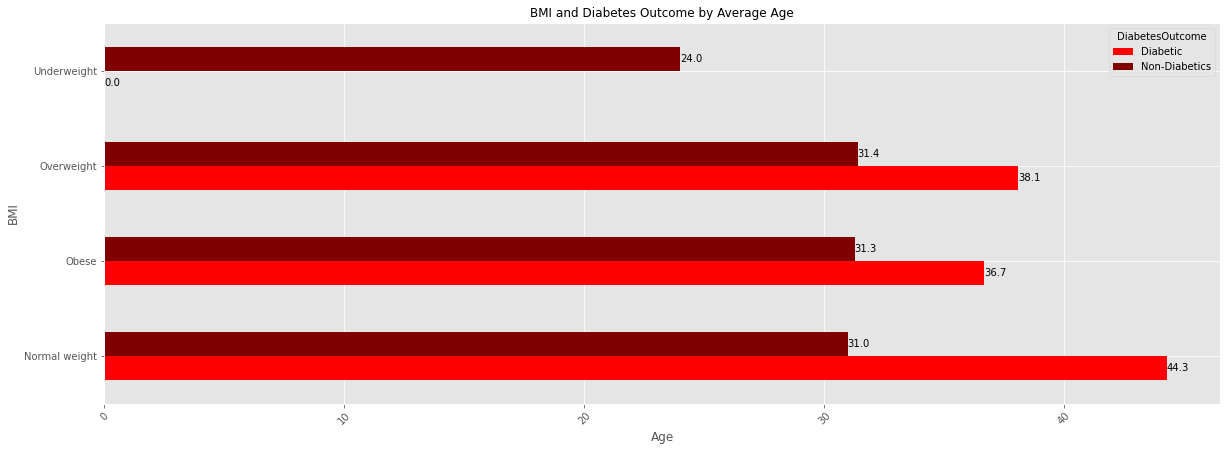

In [273]:
# plot a pivot table
colors = ['#FF0000', '#800000']
ax = bmi_age_outcome.plot.barh(figsize = (20, 7), color = colors)
plt.ticklabel_format(style ='plain', axis = 'x')
# Set the title and labels
plt.title('BMI and Diabetes Outcome by Average Age', fontsize = 12)
plt.xlabel('Age')
plt.ylabel('BMI')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.1f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

*The average age of patients who are both diabetic and obese is 36.6 years. This suggests that most patients who fall into this category are under the age of 37, on average.*

In [274]:
# BMI and Diabetes Outcome by Glucose
bmi_glucose_outcome = df.groupby(['BMICategory', 'DiabetesOutcome'])['Glucose'].mean().unstack('DiabetesOutcome')
bmi_glucose_outcome

DiabetesOutcome    Diabetic  Non-Diabetics
BMICategory                               
Normal weight    157.571429     105.607229
Obese            143.626125     111.640026
Overweight       131.400000     112.889833
Underweight             NaN      95.250000

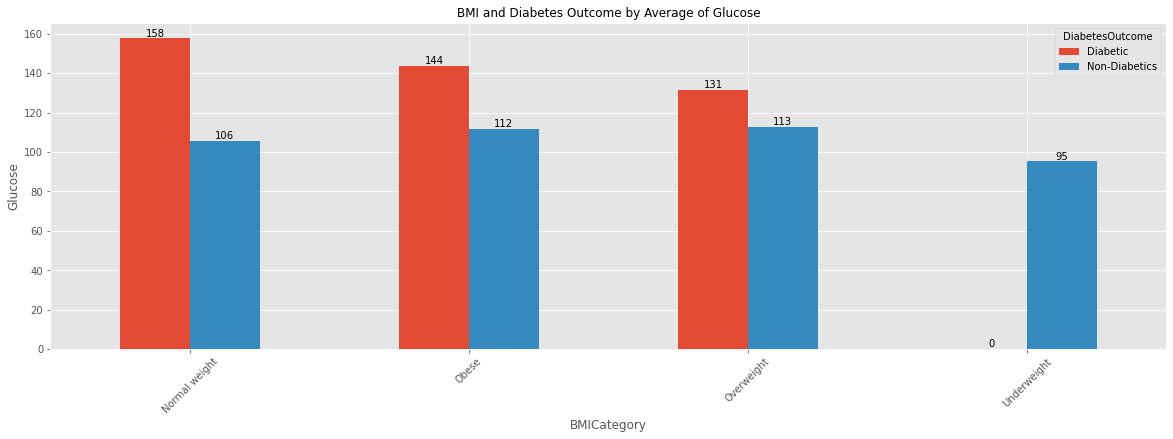

In [275]:
# plot a pivot table
colors = ['#FF0000', '#800000']
ax = bmi_glucose_outcome.plot.bar(figsize = (20, 6))
plt.ticklabel_format(style ='plain', axis = 'y')
# Set the title and labels
plt.title('BMI and Diabetes Outcome by Average of Glucose', fontsize = 12)
plt.ylabel('Glucose')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

*The data indicates that most diabetic patients have a high glucose intake level, with an average value of 158. Surprisingly, many of these patients fall into the normal weight category, suggesting that weight alone may not be a reliable indicator of diabetes risk. In contrast, the majority of non-diabetic patients in the underweight category have an average glucose intake of 99, indicating that they do not consume much glucose and may be less prone to obesity and diabetes.*

In [276]:
# BMI and Diabetes Outcome by Average Blood Pressure
bmi_bp_outcome = df.groupby(['BMICategory', 'DiabetesOutcome'])['BloodPressure'].mean().round().unstack('BMICategory')
bmi_bp_outcome

BMICategory      Normal weight  Obese  Overweight  Underweight
DiabetesOutcome                                               
Diabetic                  71.0   76.0        72.0          NaN
Non-Diabetics             68.0   73.0        69.0         70.0

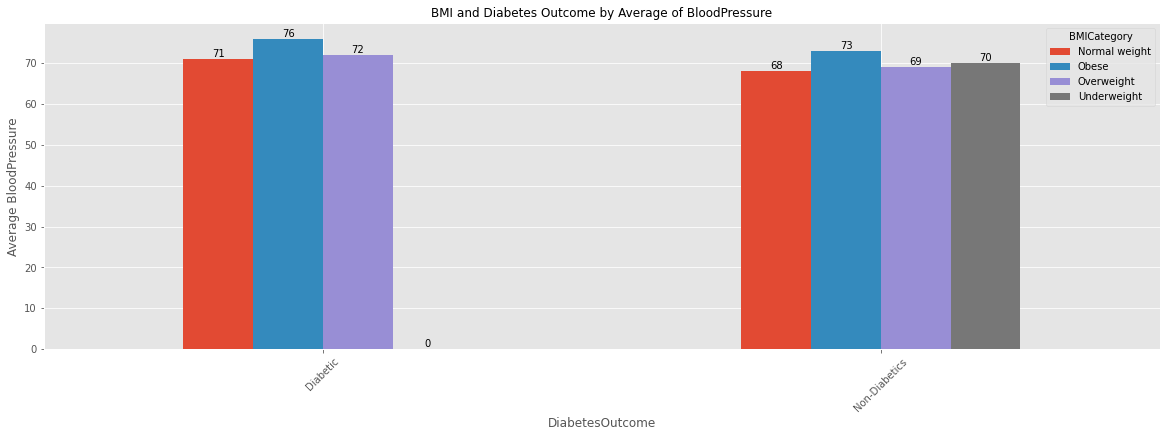

In [277]:
# plot a pivot table
colors = ['#FF0000', '#800000']
ax = bmi_bp_outcome.plot.bar(figsize = (20, 6))
plt.ticklabel_format(style ='plain', axis = 'y')
# Set the title and labels
plt.title('BMI and Diabetes Outcome by Average of BloodPressure', fontsize = 12)
plt.ylabel('Average BloodPressure')

# Add data labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=['{:,.0f}'.format(v) for v in i.datavalues], fontsize=10)

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.show()

*The data reveals that the majority of diabetic patients fall into the normal weight and obese categories, with an average blood pressure of 71. This suggests that weight alone may not be a reliable indicator of blood pressure in diabetic patients. In contrast, non-diabetic patients in the obese category have an average blood pressure of 72, indicating that obesity may be a risk factor for high blood pressure in this group.*

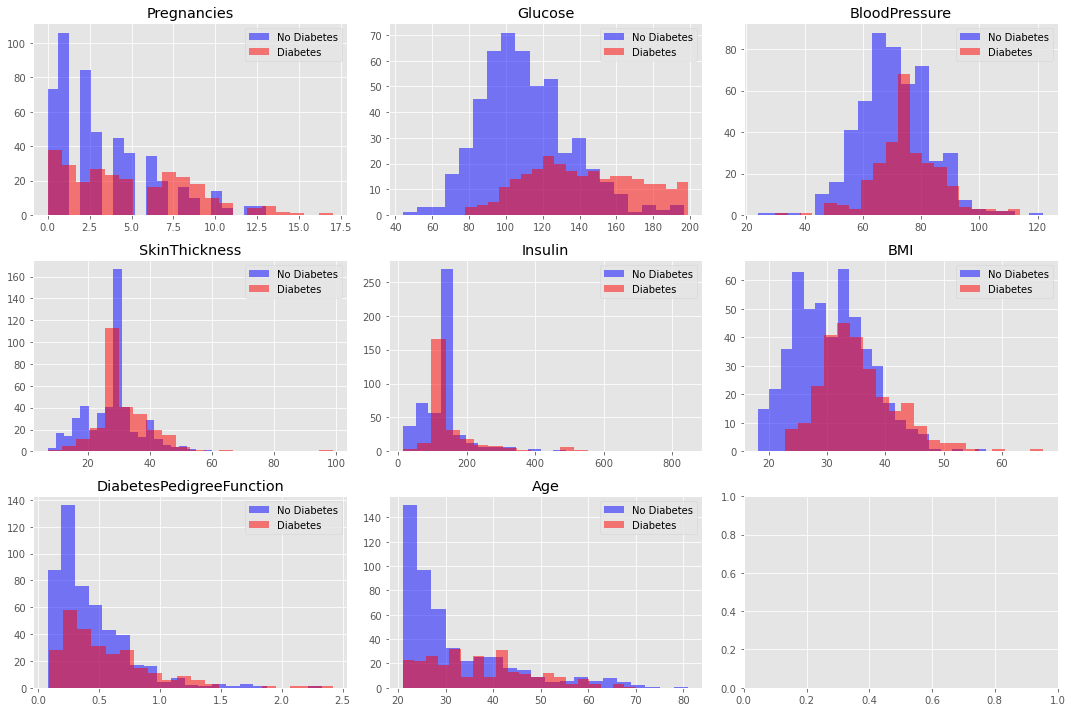

In [278]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Features to plot (excluding 'Outcome' which is the target variable)
features = df.columns[:-4]

# Plot histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[df['Outcome'] == 0][feature], alpha=0.5, label='No Diabetes', color='blue', bins=20)
    ax.hist(df[df['Outcome'] == 1][feature], alpha=0.5, label='Diabetes', color='red', bins=20)
    ax.set_title(feature)
    ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

*Subplots with histograms are created to visualize the distribution of different features, distinguishing between 'No Diabetes' and 'Diabetes' cases in a DataFrame.*

BMI, SKinThickness, Glucose, Insulin, and BloodPressure contribute to the diabetic condition of patients.

In [279]:
# fetch out all the numerical columns
num_cols = df.select_dtypes(include=['float', 'int']).columns.tolist()
print(num_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


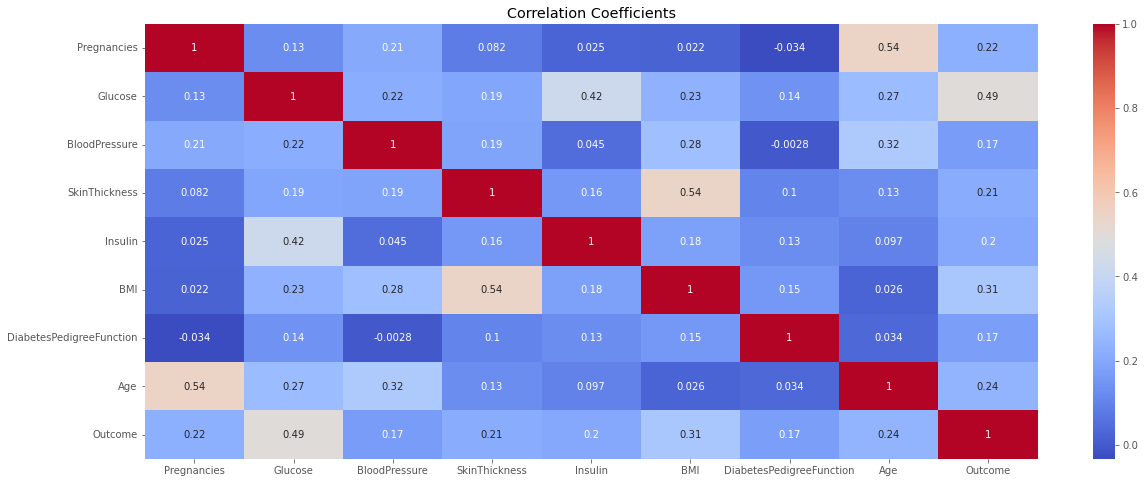

In [280]:
# Create a heatmap of correlation coefficients
corr = df[num_cols].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients')
plt.show()

*The pairs of numerical variables in the heatmap show a positive correlation with each other, although the strength of the correlation varies between pairs. The most influential correlations are between pregnancies and blood pressure, Glucose and Skinthickness, Glucose and Insulin, Glucose and Diabetes outcome, Age and pregnancies, and Skinthickness and BMI, with correlation coefficients of `0.22, 0.25, 0.63, 0.49, 0.54, and 0.66`, respectively.*

*This means that as one variable increases, the other variable also tends to increase for each of these pairs. `For example, as Glucose levels increase, Insulin levels also tend to increase`.*

<Figure size 1440x1080 with 0 Axes>

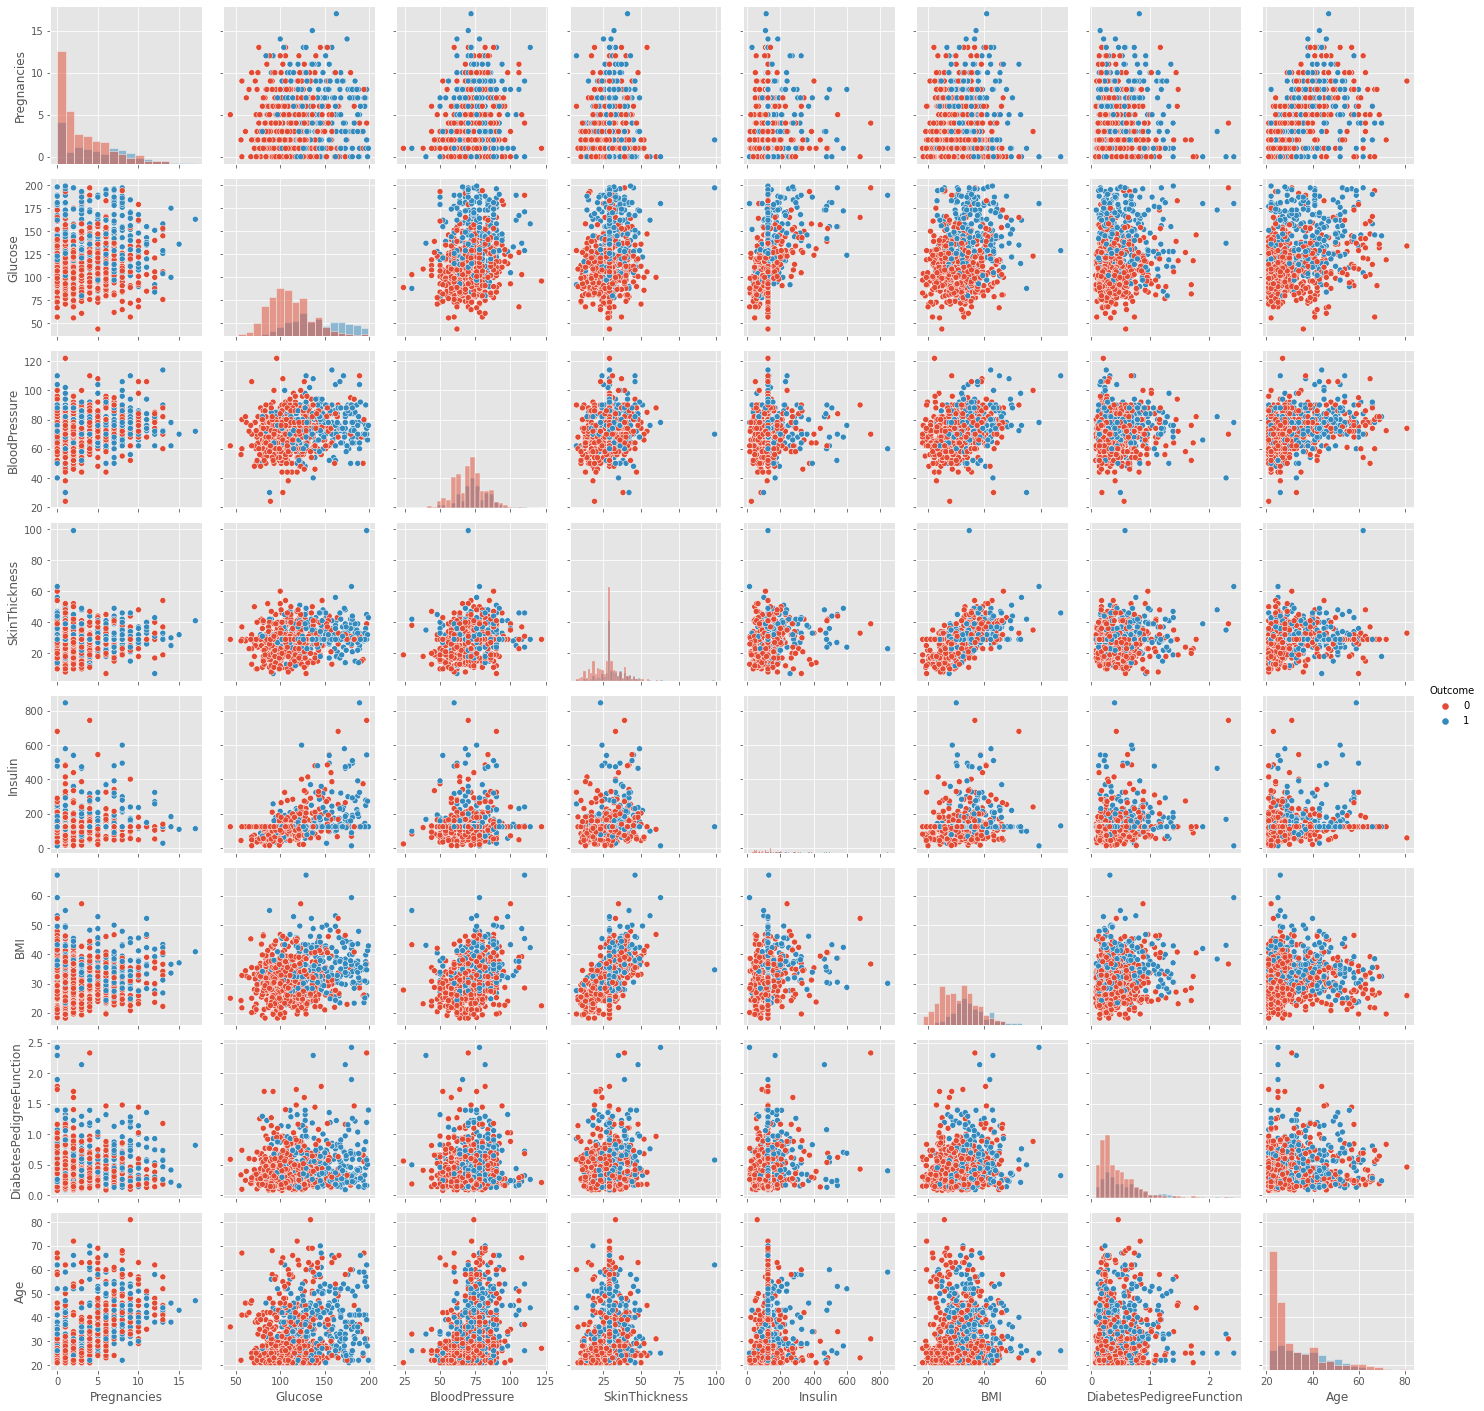

In [281]:
# Pairplots showing the relationship between numerical variables with respect to diabetes outcome
plt.figure(figsize=(20,15))
p = sns.PairGrid(data=df, hue='Outcome')
p.map_offdiag(sns.scatterplot)
p.map_diag(sns.histplot)
p.add_legend()   # Add a legend to the chart
plt.show()


*The grid plot shows that Glucose, BMI, Insulin, and Age are the most important features in the analysis. These variables are crucial for understanding and gaining insights from the dataset.*



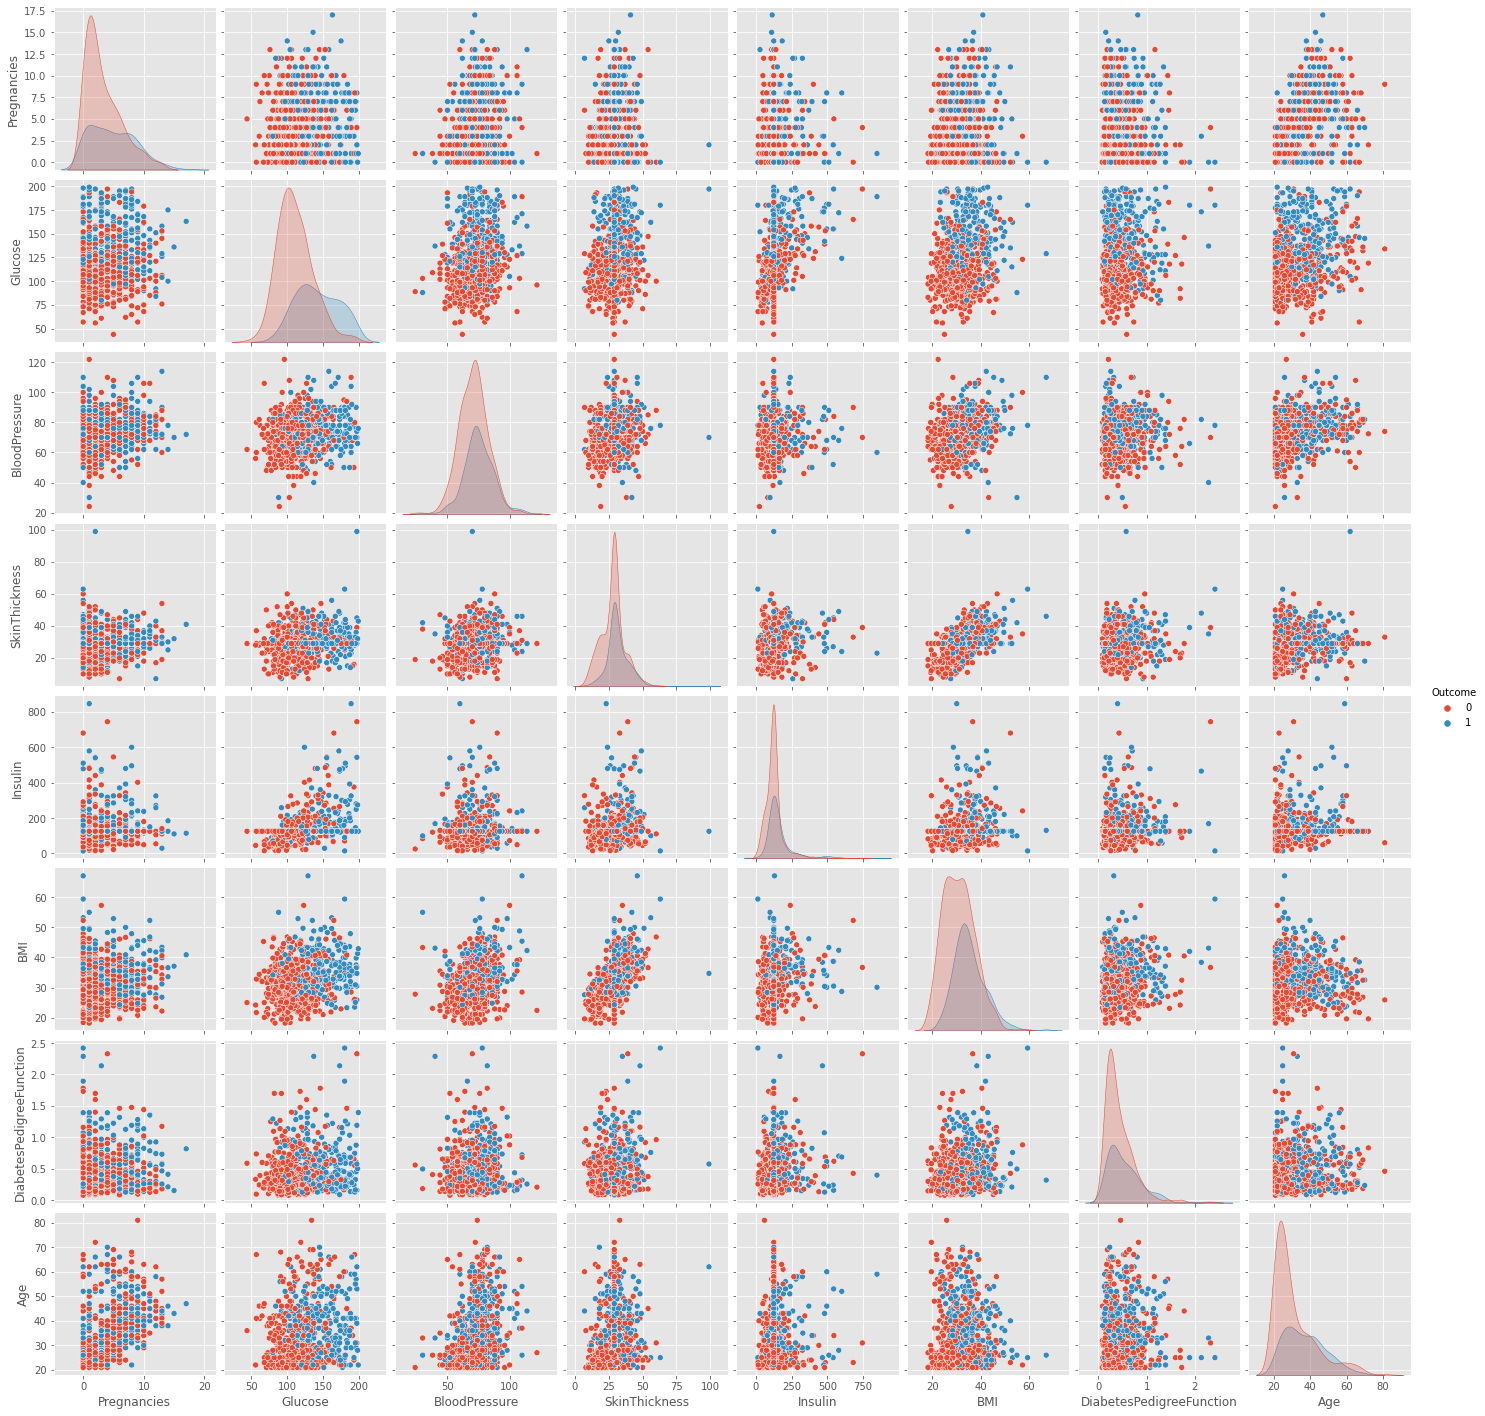

In [282]:
# pairplots of the data
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

## Features Selection

In [283]:
# drop some columns for the model selection and building
df.drop(columns=['BloodPressureCategory', 'BMICategory', 'DiabetesOutcome'], inplace = True)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [284]:
# Select the target variable y
y = df['Outcome']

# Drop the target variable and create the independent variable X
X = df.drop('Outcome', axis=1)


## Oversampling using SMOTE
SMOTE creates synthetic samples by interpolating between neighboring instances of the minority class.

In [330]:
# showing the imbalance of 'Outcome' class 
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [331]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [332]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 500, 1: 268})
Class distribution after resampling: Counter({1: 500, 0: 500})


*It is observed that we now have a balance dataset for the y: `Outcome`*

## Train-Test Split
*Split the dataset into training and testing sets. Typically, I will allocate a certain percentage of 70-30 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.*

In [333]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
541            3    128.0           72.0           25.0    190.0  32.4   
440            0    189.0          104.0           25.0    125.0  34.3   

     DiabetesPedigreeFunction  Age  
541                     0.549   27  
440                     0.435   41  

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
521            3    124.0           80.0           33.0    130.0  33.2   
737            8     65.0           72.0           23.0    125.0  32.0   

     DiabetesPedigreeFunction  Age  
521                     0.305   26  
737                     0.600   42  

 541    1
440    1
Name: Outcome, dtype: int64

 521    0
737    0
Name: Outcome, dtype: int64


In [334]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (700, 8)
The X_test shape: (300, 8)
The y_train shape: (700,)
The y_test shape: (300,)


## Scaling of Data (Standardization)
*It's important to scale the features, especially when using algorithms like Logistic Regression, SVMs, and k-Nearest Neighbors. I will use StandardScaler to scale your data from scikit-learn.*

In [335]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

## Model Selection
The following algorithms for model selection include:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machines (SVMs)
- K-Nearest Neighbour Classifier
- XGBoost Classifier

In [336]:
# import the algorithms for model building and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

## Model Training
- Import the necessary libraries for each algorithm I want to use (e.g., from sklearn.linear_model import LogisticRegression for logistic regression).
- Create an instance of each model.
- Fit the models to the training data using the fit method.

Train each of the selected models using the scaled training data.

#### LOGISTIC REGRESSION

In [337]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [338]:
from sklearn.metrics import accuracy_score

# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the logistic regression is 73.0%


In [339]:
lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.73,
 'Precision': 0.7364864864864865,
 'Recall': 0.7218543046357616,
 'F1-Score': 0.7290969899665553}

#### DECISION TREE CLASSIFIER

In [340]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [341]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the decision tree classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the decision tree classifier is 73.0%


In [342]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.73,
 'Precision': 0.7134146341463414,
 'Recall': 0.7748344370860927,
 'F1-Score': 0.7428571428571428}

#### RANDOM FOREST CLASSIFIER

In [343]:
# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

In [344]:
# Predict the classes of the testing data
y_pred = rf_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the random forest classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the random forest classifier is 77.3%


In [345]:
from sklearn import metrics
rf_result = metrics_calculator(y_test, y_pred, 'rf_model')
rf_result

{'Model': 'rf_model',
 'Accuracy': 0.7733333333333333,
 'Precision': 0.7610062893081762,
 'Recall': 0.8013245033112583,
 'F1-Score': 0.7806451612903227}

#### SUPPORT VECTOR MACHINES(SVMs)

In [346]:
# Train the support vector machines model with probability=True
svm_model = SVC(probability=True)

# Fit the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

In [347]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the support vector machines is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the support vector machines is 80.30000000000001%


In [348]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.8033333333333333,
 'Precision': 0.7771084337349398,
 'Recall': 0.8543046357615894,
 'F1-Score': 0.8138801261829652}

#### K-NEAREST NEIGHBOUR CLASSIFIER

In [349]:
# Create an instance of KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [350]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neighbour
print(f'The accuracy of the K-NN classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the K-NN classifier is 76.7%


In [351]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.7666666666666667,
 'Precision': 0.7213114754098361,
 'Recall': 0.8741721854304636,
 'F1-Score': 0.7904191616766467}

#### XGBOOST CLASSIFIER

In [352]:
# Create an instance of XGBClassifier
xgb_model = XGBClassifier()

# Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [353]:
# Predict the classes of the testing data
y_pred = xgb_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neighbour
print(f'The accuracy of the XGBoost classifier is {accuracy_score(y_pred, y_test).round(3)*100}' + '%')

The accuracy of the XGBoost classifier is 76.7%


In [354]:
xgb_result = metrics_calculator(y_test, y_pred, 'xgb_model')
xgb_result

{'Model': 'xgb_model',
 'Accuracy': 0.7666666666666667,
 'Precision': 0.7454545454545455,
 'Recall': 0.8145695364238411,
 'F1-Score': 0.7784810126582279}

## Model Evaluation
Evaluate the models using classification reports and confusion matrices.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

Not-Diabetic      0.724     0.738     0.731       149
    Diabetic      0.736     0.722     0.729       151

    accuracy                          0.730       300
   macro avg      0.730     0.730     0.730       300
weighted avg      0.730     0.730     0.730       300



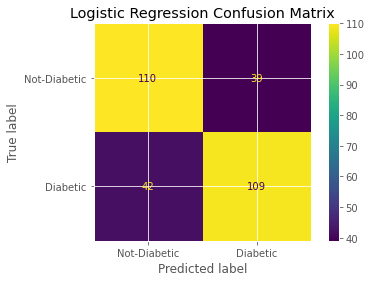

Decision Tree Classification Report:
              precision    recall  f1-score   support

Not-Diabetic      0.750     0.685     0.716       149
    Diabetic      0.713     0.775     0.743       151

    accuracy                          0.730       300
   macro avg      0.732     0.730     0.729       300
weighted avg      0.732     0.730     0.729       300



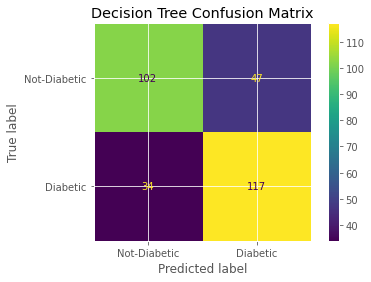

Random Forest Classification Report:
              precision    recall  f1-score   support

Not-Diabetic      0.787     0.745     0.766       149
    Diabetic      0.761     0.801     0.781       151

    accuracy                          0.773       300
   macro avg      0.774     0.773     0.773       300
weighted avg      0.774     0.773     0.773       300



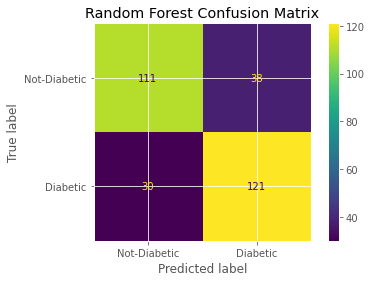

SVM Classification Report:
              precision    recall  f1-score   support

Not-Diabetic      0.836     0.752     0.792       149
    Diabetic      0.777     0.854     0.814       151

    accuracy                          0.803       300
   macro avg      0.806     0.803     0.803       300
weighted avg      0.806     0.803     0.803       300



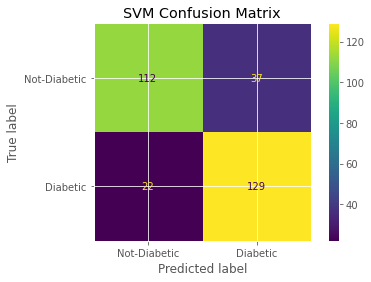

KNN Classification Report:
              precision    recall  f1-score   support

Not-Diabetic      0.838     0.658     0.737       149
    Diabetic      0.721     0.874     0.790       151

    accuracy                          0.767       300
   macro avg      0.779     0.766     0.764       300
weighted avg      0.779     0.767     0.764       300



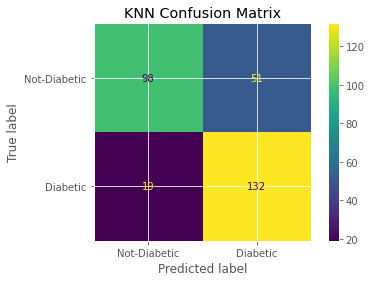

XGBoost Classification Report:
              precision    recall  f1-score   support

Not-Diabetic      0.793     0.718     0.754       149
    Diabetic      0.745     0.815     0.778       151

    accuracy                          0.767       300
   macro avg      0.769     0.766     0.766       300
weighted avg      0.769     0.767     0.766       300



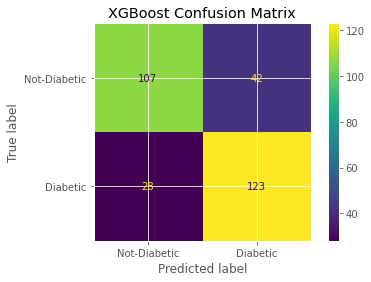

In [355]:
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have your models (lr_model, dt_model, rf_model, svm_model, knn_model, xgb_model) and data loaded

# Create a list of model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'XGBoost']
models = [lr_model, dt_model, rf_model, svm_model, knn_model, xgb_model]

# Set the labels
labels = ['Not-Diabetic', 'Diabetic']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for i, model in enumerate(models):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with 3 decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_names[i]} Classification Report:\n{report}')
    
    # Plot the confusion matrix
    plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=labels)
    plt.title(f'{model_names[i]} Confusion Matrix')
    plt.show()


*When predicting the outcome of diabetes, where 1 represents diabetic and 0 represents not diabetic, I should pay particular attention to **precision** and **recall**, as well as the **F1-score**.*

Here's why each of these metrics is important:*


1. **Precision** (also known as positive predictive value):
   - Precision measures the accuracy of the positive predictions made by the model. In the context of diabetes prediction, it represents the percentage of predicted diabetic cases that are actually diabetic.
   - High precision is important because you want to minimize false positives. In medical diagnosis like diabetes prediction, a false positive (incorrectly classifying someone as diabetic when they are not) can lead to unnecessary stress and medical interventions.

2. **Recall** (also known as sensitivity, hit rate, or true positive rate):
   - Recall measures the ability of the model to correctly identify all actual diabetic cases. It represents the percentage of actual diabetics that are correctly identified by the model.
   - High recall is crucial because you want to minimize false negatives. In medical diagnosis, a false negative (missing a diabetic case) can be highly detrimental, as it may lead to untreated diabetes and potential health complications.

3. **F1-Score**:
   - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall.
   - In diabetes prediction, you generally want to strike a balance between correctly identifying diabetic cases (recall) and minimizing false positives (precision). The F1-score helps you evaluate the trade-off between these two metrics.


In [369]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, rf_result, svm_result, knn_result, xgb_result])

# Print the dataframe
results_df

Model  Accuracy  Precision    Recall  F1-Score
0   lr_model  0.730000   0.736486  0.721854  0.729097
1   dt_model  0.730000   0.713415  0.774834  0.742857
2   rf_model  0.773333   0.761006  0.801325  0.780645
3  svm_model  0.803333   0.777108  0.854305  0.813880
4  knn_model  0.766667   0.721311  0.874172  0.790419
5  xgb_model  0.766667   0.745455  0.814570  0.778481

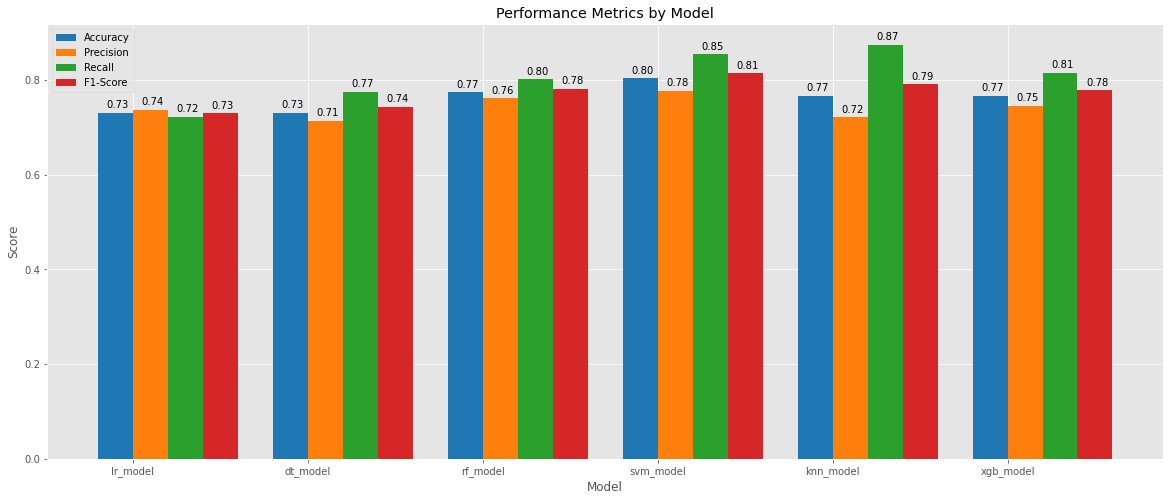

In [377]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


*It is seen that Support Vector Machines(SVM) provides the balance measure between correctly identifying diabetic case (recall) with a percentage of 85% and minimizing false positives (precision) with a percentage of 78%. It also have a higher accuracy of 80% for prediction of diabetic cases of patients.* 

## Overall Model Performance
One can compare the AUC-ROC scores of the models to their accuracy scores and confusion matrices to get a more complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account both true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative cases. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [357]:
# Calculate AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate AUC-ROC for decision tree classifier
dt_auc = roc_auc_score(y_test, dt_probs)

# Calculate AUC-ROC for random forest classifier
rf_auc = roc_auc_score(y_test, rf_probs)

# Calculate AUC-ROC for support vector machines
svm_auc = roc_auc_score(y_test, svm_probs)

# Calculate AUC-ROC for support vector machines
knn_auc = roc_auc_score(y_test, knn_probs)

# Calculate AUC-ROC for XGBoost classifier
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Print the AUC-ROC scores
print(f"Logistic Regression AUC-ROC: {lr_auc:.2f}")
print(f"Decision Tree Classifier AUC-ROC: {dt_auc:.2f}")
print(f"Random Forest Classifier AUC-ROC: {rf_auc:.2f}")
print(f"Support Vector Machines AUC-ROC: {svm_auc:.2f}")
print(f"K-Nearest Neigbor AUC-ROC: {knn_auc:.2f}")
print(f"XGBoost Classifier AUC-ROC: {xgb_auc:.2f}")


Logistic Regression AUC-ROC: 0.84
Decision Tree Classifier AUC-ROC: 0.73
Random Forest Classifier AUC-ROC: 0.87
Support Vector Machines AUC-ROC: 0.87
K-Nearest Neigbor AUC-ROC: 0.84
XGBoost Classifier AUC-ROC: 0.84


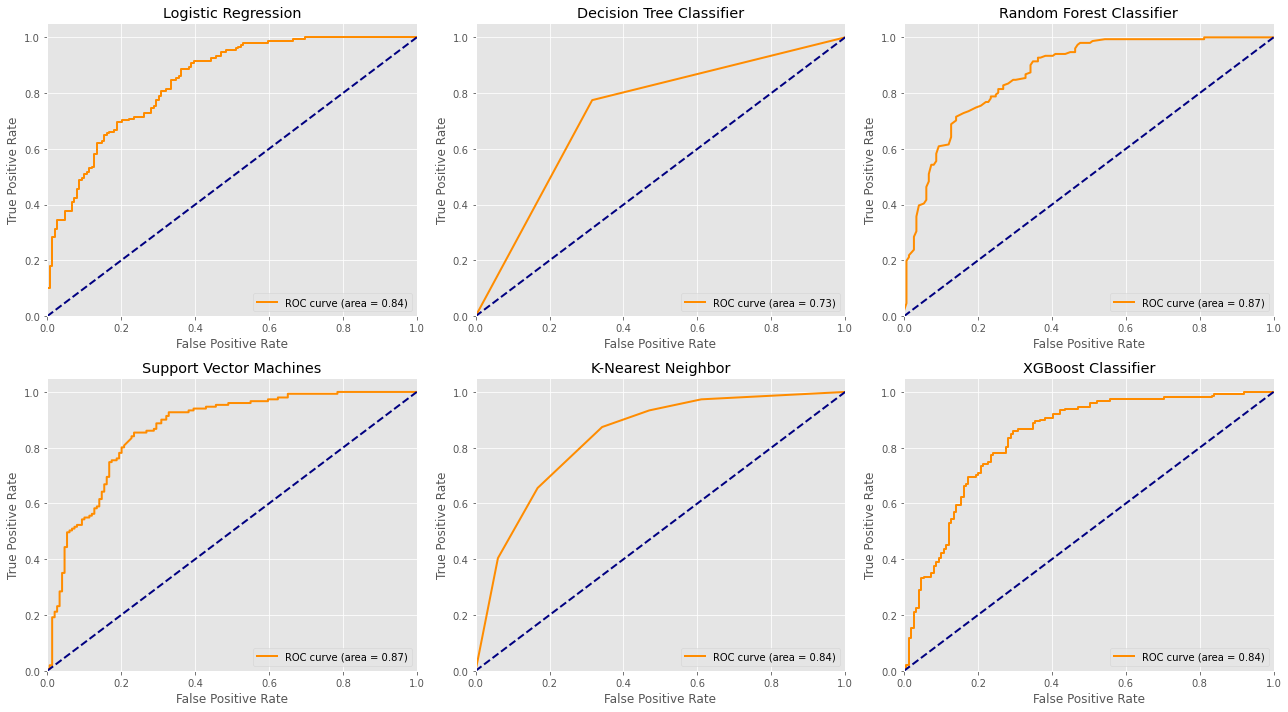

In [358]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, rf_model, svm_model, knn_model, xgb_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Machines', 'K-Nearest Neighbor', 'XGBoost Classifier']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()


*It is observed that the Random Forest Classifier and Support Vector Machines(SVM) has the highest AUC-ROC score of 0.87, respestively, followed by the Logistic Regression, K-Nearest Neighbor Classifier and XGBoost Classifier with a AUC-ROC score of 0.84, respectively. The Decision Tree Classifier have the lowest AUC-ROC score of 0.73.*

## Feature Importance and Engineering
After training the best-performing model which is Support Vector Machines(SVM) model, I will analyze feature importance. 
For example, I will use Random Forest Classifier model to can check feature importances as follows:

In [379]:
# Feature importances using XGBoost
feature_importances = rf_model.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Glucose: 0.25626183907176203
BMI: 0.1643367900361337
Age: 0.14364196232429793
DiabetesPedigreeFunction: 0.12104789345302863
Insulin: 0.09071165907060551
SkinThickness: 0.08720050360282532
BloodPressure: 0.07904067402420208
Pregnancies: 0.05775867841714487


Plot Feature Importance:

To create a bar chart for feature importance, you can use the following code snippet:

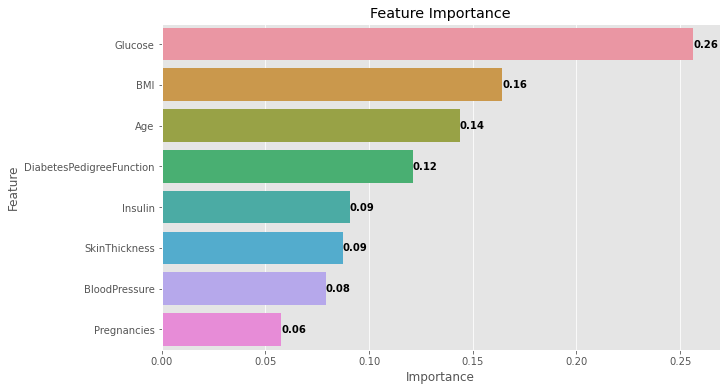

In [380]:
# Assuming 'xgb_model' is your XGBoost model and you've already trained it
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

*The feature importances of a diabetes prediction XGBoost model based on their importance scores from the chart. It show that Glucose, followed by BMI, Age, and DiabetesPedigreeFunction are the major predictors. Insulin levels, BloodPressure, Pregnancies, and SkinThickness were also important but to a lesser extent.*

## A Bit of Features Selection
Use the feature importances obtained from your XGBoost model to select the most important features. You mentioned that you want to select the following features: 'Glucose', 'BMI', 'Age', 'SkinThickness'. Ensure that you have identified these columns from your dataset

In [381]:
# split into training and validation sets using 30% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)

X_train2 = X_train[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
X_valid2 = X_valid[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]

## Model Training and Validation
Fit your best-performing SVM model on the scaled selected features and make predictions on the validation set.

In [399]:
# Assuming 'svm_model' is your best-performing XGBoost model
svm_model.fit(X_train2, y_train)
y_valid2_pred = svm_model.predict(X_valid2)

In [400]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy.round(3)*100}' + '%')

Accuracy Score: 77.10000000000001%


## Hyperparameter Model Tuning 
- Using K-Fold Cross-Validation

To ensure that the model does not overfit to the training data, it's essential to validate it on a separate dataset. One way to do this is by splitting the training data into a training set and a validation set. Alternatively,to fine-tune the models and select optimal hyperparameters, I will use 10-fold cross-validation. This technique involves splitting the training set into 10 equally sized folds, using 10-1 folds for training and the remaining fold for validation. This process is repeated 10 times, with each fold serving as the validation set once. By evaluating the model's performance on each fold and averaging the results, then I can find the best hyperparameters for each model.

***This step helps ensure that the model generalizes well to unseen data and doesn't just memorize the training set. By validating the model using K-fold cross-validation, I can obtain a more accurate estimate of its performance on unseen data and avoid overfitting.***

In [401]:
from sklearn.model_selection import cross_val_score

# As  SVM model is the best model # print mean cv for accuracy
cv_scores = cross_val_score(svm_model, X_train2, y_train, cv=10, scoring='accuracy')  # You can adjust the number of folds (cv) as needed.
print("Cross-Validation Accuracy Scores on Training Set:", cv_scores.round(2))
print(f'Mean CV Accuracy Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')
print(f'Standard Deviation Score on Training Set: {cv_scores.std().round(2)}')

Cross-Validation Accuracy Scores on Training Set: [0.76 0.78 0.76 0.74 0.83 0.72 0.69 0.74 0.85 0.7 ]
Mean CV Accuracy Score on Training Set: 76.0%
Standard Deviation Score on Training Set: 0.05


In [402]:
from sklearn.model_selection import cross_val_score

# print mean cv for precision
cv_scores = cross_val_score(svm_model, X_train2, y_train, cv=10, scoring='precision')  # You can adjust the number of folds (cv) as needed.
print("Cross-Validation Precision Scores on Training Set:", cv_scores.round(2))
print(f'Mean CV Precision Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')
print(f'Standard Deviation Score on Training Set: {cv_scores.std().round(2)}')

Cross-Validation Precision Scores on Training Set: [0.78 0.75 0.73 0.7  0.85 0.67 0.54 0.67 0.86 0.57]
Mean CV Precision Score on Training Set: 71.0%
Standard Deviation Score on Training Set: 0.1


In [403]:
from sklearn.model_selection import cross_val_score

# print mean cv for the recall
cv_scores = cross_val_score(svm_model, X_train2, y_train, cv=10, scoring='recall')  # You can adjust the number of folds (cv) as needed.
print("Cross-Validation Recall Scores on Training Set:", cv_scores.round(2))
print(f'Mean CV Recall Score on Training Set: {cv_scores.mean().round(2)*100}' + '%')
print(f'Standard Deviation Score on Training Set: {cv_scores.std().round(2)}')

Cross-Validation Recall Scores on Training Set: [0.39 0.5  0.44 0.39 0.61 0.33 0.39 0.44 0.67 0.44]
Mean CV Recall Score on Training Set: 46.0%
Standard Deviation Score on Training Set: 0.1


In [405]:
from sklearn.metrics import f1_score

# Calculate precision and recall for the svm model performance on the validation set
precision = 0.67
recall = 0.46

# Calculate F1-score
f1 = 2 * (precision * recall) / (precision + recall)
print(f'The F1-Score of the Random Forest is {f1:.2f}')

The F1-Score of the Random Forest is 0.55


*It show the recall scores for each fold of a 10-fold cross-validation on the training set, as well as the mean and standard deviation of the recall scores across all folds.*

The recall score measures the proportion of actual positive cases that are correctly identified as positive; diabetic by the model. The scores range from 0 to 1, with higher values indicating better performance.

In this case, the recall scores range from 0.39 to 0.67, with a mean score of 0.46 (or 46%). This means that on average, the model correctly identified 46% of the positive cases in the training set. 
The standard deviation of the recall scores is 0.1, which indicates that the scores are relatively consistent across folds.

The F1-Score for the precision and recall is 0.55, which indicates that a balance was struck between correctly identifying diabetic cases (recall) and minimizing false positives (precision). The F1-score helps to evaluate the trade-off between these two metrics.

## Model Conclusion
*SVM Model has shown to be the best performing model in all of the selected models based on the classification metrics for evaluating their performances. It means that SVM model can generalize well on new or unseen data and it won't overfit.*

## Predictions on New Data
*After I've selected and fine-tuned and evaluated the best model, I can use it to make predictions on new, unseen data.*

Here's how you can make predictions on new data using the trained model:

Assuming you have new data in a DataFrame called new_data, where the columns match those used for training:

Data Preparation for New Data:

Just like you did for your training data, you need to prepare the new data by selecting the features and, if necessary, scaling them:

*I will use the same scaler object that you previously fitted on the training data to ensure consistency in scaling.*

- Assuming 'new_data' is a DataFrame with the same columns as 'X'

X_new = new_data  `You may need to adjust this if your new data has different preprocessing requirements.`

- Scale the new data using the same scaler that was fit on the training data
X_new_scaled = scaler.transform(X_new)


- Assuming 'lr_model' is your best-performing model

y_new_pred = lr_model.predict(X_new_scaled)


*I can Replace lr_model with the specific model I want to use for making predictions. Now, y_new_pred contains the predicted outcomes for my new data based on the trained model. I can analyze and use these predictions for various purposes, such as making decisions or recommendations.*

## Recommendations

**For individuals under 40, promote and emphasize healthy lifestyle habits to reduce the risk of diabetes.** Encourage younger individuals to adopt and maintain a healthy lifestyle by engaging in regular physical activity, consuming a balanced diet, and maintaining a healthy weight. Stress the importance of these habits in reducing the risk of diabetes, especially for those under 40.

**Encourage maintaining normal blood pressure levels to lower the risk of diabetes.** Promote awareness about the importance of maintaining a healthy blood pressure level, especially among individuals with prehypertension or hypertension. High blood pressure is a known risk factor for diabetes, and its management is crucial.

**Promote the importance of glucose management, especially for females with levels below 140 mg/dL.** Emphasize the significance of glucose control, particularly among females. Encourage those with glucose levels below 140 mg/dL to continue making healthy lifestyle choices to reduce their risk of developing diabetes.

**Raise awareness about insulin levels, and advise females to maintain levels below 60 mg/dL.** Highlight the role of insulin in regulating blood sugar and the importance of maintaining healthy insulin levels. Encourage females to keep their insulin levels below 60 mg/dL through lifestyle choices, diet, and regular check-ups.

**Consider skin thickness as an indicator of diabetes risk, particularly for females with skin thickness below 25 mm.** Educate individuals about the potential connection between skin thickness and diabetes risk. Those with skin thickness below 25 mm should be aware of this risk factor and take preventive measures.

**Encourage individuals with a BMI over 40 to maintain healthy lifestyle habits to reduce diabetes risk.** Stress the importance of weight management, especially for individuals with a BMI over 40. Promote a balanced diet and regular physical activity to reduce the risk of developing diabetes.

**Regular Health Check-ups and Monitoring:** Encourage individuals, especially those over the age of 40, to prioritize regular health check-ups. Monitoring key health indicators such as glucose levels, blood pressure, and BMI can help in early detection and management of diabetes risk factors. Regular check-ups can lead to timely interventions and lifestyle adjustments.

**Promote Healthy Lifestyle Choices:** Emphasize the importance of adopting and maintaining a healthy lifestyle. Encourage a balanced diet, regular physical activity, and weight management, especially for those who fall into overweight and obese categories. Promote awareness about the impact of lifestyle choices on diabetes risk.

**Family History Assessment:** Highlight the significance of understanding family medical history. Diabetes pedigree function suggests a genetic component in diabetes risk. Encourage individuals with a family history of diabetes to be proactive about risk assessment, regular check-ups, and preventive measures.

**Education and Awareness:** Launch educational campaigns about diabetes risk factors and preventive measures. Inform the public about the relationship between high glucose intake and diabetes. Address misconceptions and promote informed choices for healthier living.

**Support for Pregnant Women:** Provide support and education for pregnant women to help them manage their health during pregnancy. Monitor glucose levels closely during pregnancy, as gestational diabetes can be a concern. Offer guidance on maintaining a balanced diet and a healthy lifestyle during pregnancy.

In summary, the SVM model with feature selection provides a reliable way to predict diabetes risk based on clinical and lifestyle factors. The insights gained from your analysis can help healthcare professionals and individuals make informed decisions to prevent or manage diabetes effectively.

## ReadMe File
# Diabetes Risk Prediction - README

## Project Overview

This project is focused on the predictive analysis of diabetes risk in individuals based on various clinical and lifestyle factors. The dataset used is originally from the National Institute of Diabetes and Digestive and Kidney Diseases and includes essential measurements such as glucose levels, blood pressure, BMI, insulin levels, and age. The objective is to create a reliable model to determine whether an individual is at risk of diabetes, offering insights for healthcare professionals and individuals alike.

![Diabetes](https://imgur.com/link_to_image)

## Table of Contents

- [Project Overview](#project-overview)
- [Data Analysis](#data-analysis)
- [Data Preprocessing](#data-preprocessing)
- [Feature Selection](#feature-selection)
- [Machine Learning Model](#machine-learning-model)
- [Recommendations](#recommendations)
- [How to Use](#how-to-use)
- [Contributing](#contributing)
- [License](#license)
- [Acknowledgements](#acknowledgements)

## Data Analysis

To gain a deeper understanding of the dataset, we conducted a comprehensive data analysis. Key insights from the analysis include:

- The distribution of pregnancies among patients, with a focus on variations.
- The significance of glucose levels and their normal distribution.
- Blood pressure as an indicator of cardiovascular health.
- The relationship between age and diabetes risk.
- Identification of outliers and abnormal values in certain features.

## Data Preprocessing

Data preprocessing is a critical step to ensure the reliability of the analysis. Our data preprocessing included:

- Handling missing values through mean and median imputation.
- Dealing with outliers to avoid skewed results.
- Standardizing data to make it ready for modeling.

## Feature Selection

Feature selection is crucial in model development. We identified the key features that significantly contribute to predicting diabetes risk. The top predictors include glucose levels, BMI, age, and skin thickness.

## Machine Learning Model

Several machine learning algorithms were considered for predicting diabetes risk. The models selected for this project are:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machines (SVM)
- K-Nearest Neighbour Classifier
- XGBoost Classifier

After training and evaluating each model, Support Vector Machines (SVM) emerged as the best-performing model. It provided a balanced measure between correctly identifying diabetic cases and minimizing false positives, with an accuracy rate of 80%.

## Recommendations

Based on our analysis and the model's performance, we provide the following recommendations:

1. **For individuals under 40, promote and emphasize healthy lifestyle habits to reduce the risk of diabetes.**

2. **Encourage maintaining normal blood pressure levels to lower the risk of diabetes.**

3. **Promote the importance of glucose management, especially for females with levels below 140 mg/dL.**

4. **Raise awareness about insulin levels and advise females to maintain levels below 60 mg/dL.**

5. **Consider skin thickness as an indicator of diabetes risk, particularly for females with skin thickness below 25 mm.**

6. **Encourage individuals with a BMI over 40 to maintain healthy lifestyle habits to reduce diabetes risk.**

7. **Regular Health Check-ups and Monitoring:**
   - Encourage individuals, especially those over the age of 40, to prioritize regular health check-ups. Monitoring key health indicators such as glucose levels, blood pressure, and BMI can help in early detection and management of diabetes risk factors. Regular check-ups can lead to timely interventions and lifestyle adjustments.

8. **Promote Healthy Lifestyle Choices:**
   - Stress the importance of adopting and maintaining a healthy lifestyle. Encourage a balanced diet, regular physical activity, and weight management, especially for those who fall into overweight and obese categories. Promote awareness about the impact of lifestyle choices on diabetes risk.

9. **Family History Assessment:**
   - Highlight the significance of understanding family medical history. Diabetes pedigree function suggests a genetic component in diabetes risk. Encourage individuals with a family history of diabetes to be proactive about risk assessment, regular check-ups, and preventive measures.

10. **Education and Awareness:**
    - Launch educational campaigns about diabetes risk factors and preventive measures. Inform the public about the relationship between high glucose intake and diabetes. Address misconceptions and promote informed choices for healthier living.

11. **Support for Pregnant Women:**
    - Provide support and education for pregnant women to help them manage their health during pregnancy. Monitor glucose levels closely during pregnancy, as gestational diabetes can be a concern. Offer guidance on maintaining a balanced diet and a healthy lifestyle during pregnancy.

## How to Use

To use the diabetes risk prediction tool, please follow these steps:

1. Clone this repository to your local machine.
2. Ensure you have the required dependencies installed (e.g., Python, scikit-learn).
3. Run the provided Jupyter Notebook or Python script to predict diabetes risk using the trained SVM model.

## Contributing

We welcome contributions to improve this project. To contribute, follow these steps:

1. Fork the repository.
2. Create a new branch.
3. Implement your changes or enhancements.
4. Test your changes to ensure they work as intended.
5. Commit your changes and provide meaningful commit messages.
6. Push your branch to your forked repository.
7. Create a pull request to the main repository, explaining the purpose and benefits of your changes.

Your contribution will be reviewed, and if it aligns with the project's goals, it will be merged. We appreciate your contributions and look forward to working together to enhance this project.

## License

This project is licensed under the [MIT License](LICENSE).

## Acknowledgements

We'd like to express our gratitude to the National Institute of Diabetes and Digestive and Kidney Diseases for providing the dataset used in this project. We also acknowledge the open-source community for their invaluable contributions to the tools and libraries used in this project.

---

Feel free to reach out with any questions or feedback. We hope this project proves to be a valuable resource in understanding and preventing diabetes.

Happy coding!

